### Implementing HDBSCAN to cluster spending habits of accounts

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import HDBSCAN, DBSCAN
import seaborn as sns

In [13]:
spending_data = pd.read_csv('C:/Users/camer/OneDrive/Documents/Data Science MSc/DSMP/Normalised_proportional_spending_by_account.csv')
spending_data.head()

,Sender account,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket
0,1000.0,-0.823946,1.469060,-0.659479,-0.461756,-0.599109,2.363629,0.330532,-0.335033,0.547045,-0.395954,-0.655493,-0.593556,5.031022,-1.163425
1,1002.0,0.206617,2.090178,-0.695943,-0.214125,-0.708981,-0.202244,0.443402,-0.335033,3.472580,0.104802,-0.627263,-0.839066,-0.384490,-0.761329
2,1006.0,-0.141294,-0.598923,0.642122,1.045971,-0.745641,1.381723,-0.817788,-0.335033,0.901520,-0.395954,2.001449,-0.756300,-0.384490,-1.177781
3,1018.0,-0.435344,-1.410646,-0.611389,-0.639188,2.068229,-1.209232,0.391902,-0.335033,-0.652950,-0.395954,1.555709,2.145807,-0.099624,-0.763351
4,1053.0,0.785170,-0.434381,-0.695943,-0.552537,2.356540,-0.107351,1.214833,-0.053129,1.080736,-0.395954,-0.592384,0.945316,-0.384490,-0.998671


Splitting the data into features and targets

In [14]:
X = spending_data.drop('Sender account', axis=1, errors='ignore')

#### Performing dimensionality reduction (UMAP, PCA, t-SNE)

(8142, 2)


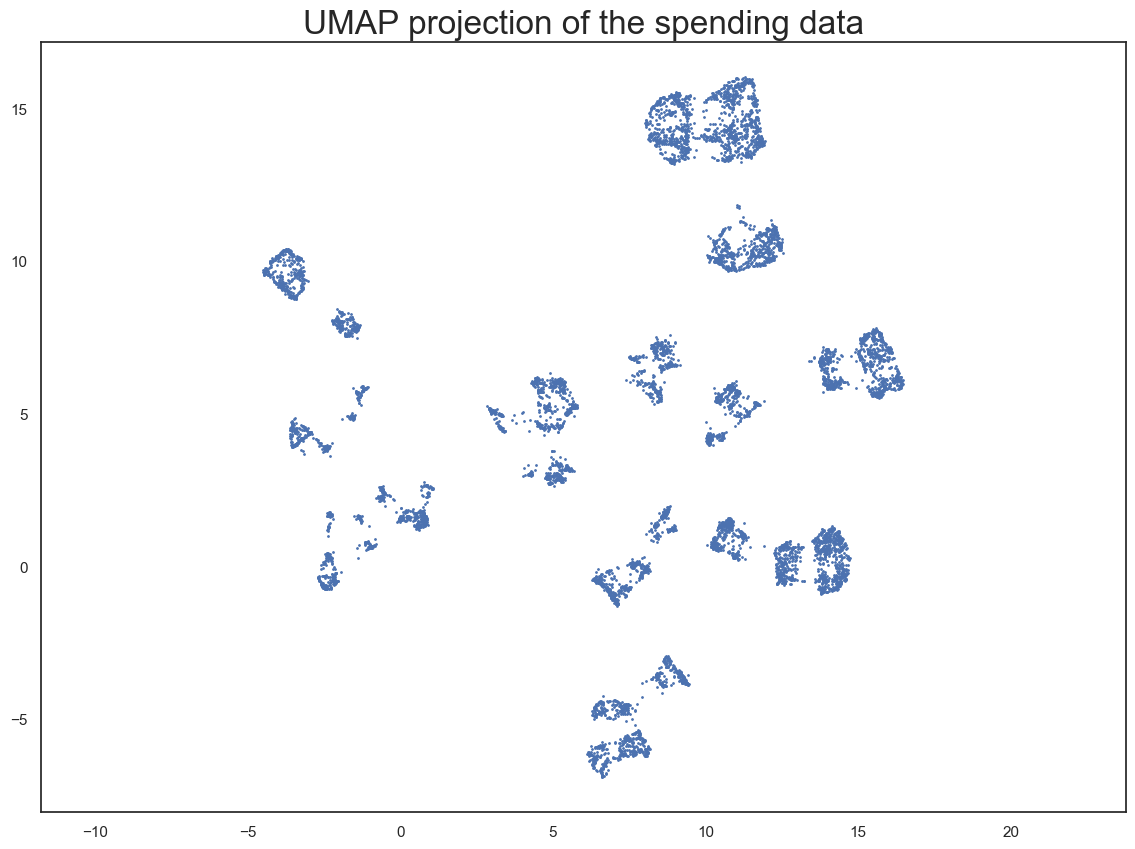

In [205]:
import umap
import matplotlib.pyplot as plt
sns.set(style='white', rc={'figure.figsize':(14,10)})

umap_model = umap.UMAP()

spending_umap = umap_model.fit_transform(X)
print(spending_umap.shape)

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
        s=1,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the spending data', fontsize=24);

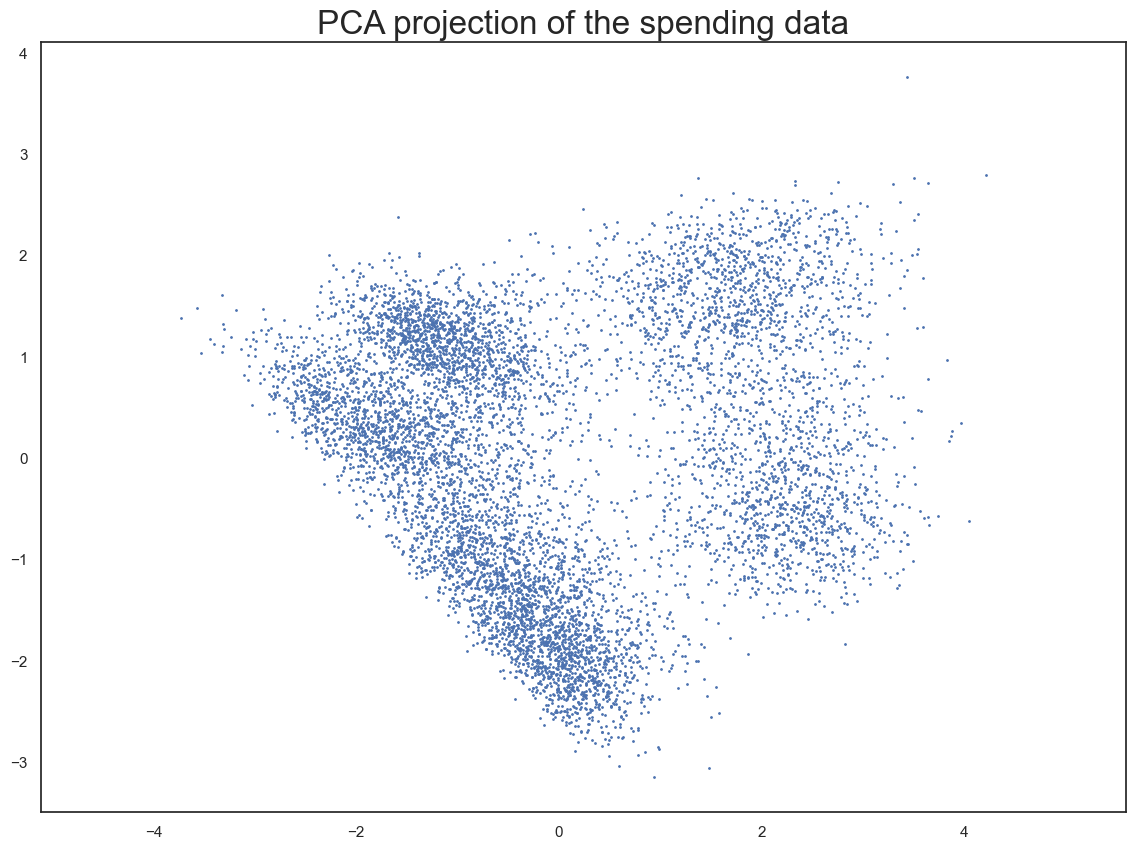

In [182]:
from sklearn.decomposition import PCA
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
pca = PCA()
spending_pca = pca.fit_transform(X)

plt.scatter(
    spending_pca[:, 0],
    spending_pca[:, 1],
        s=1,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA projection of the spending data', fontsize=24);

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


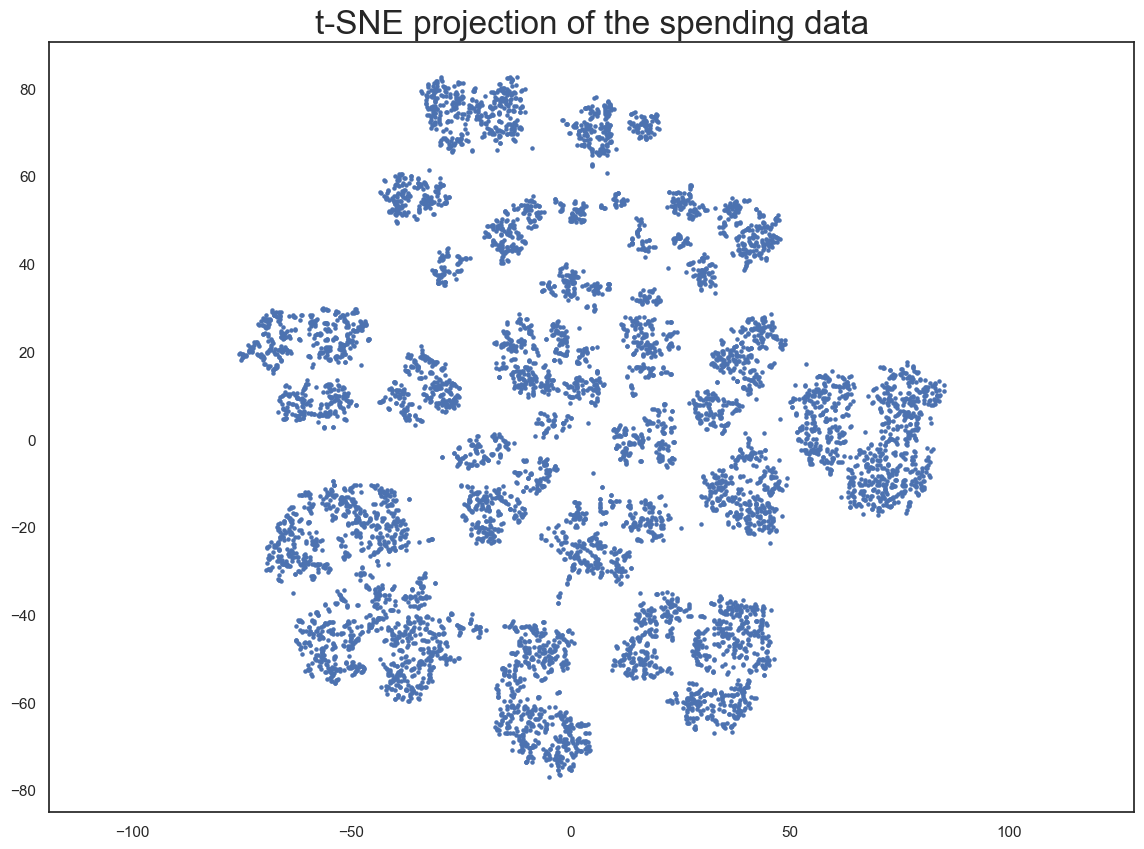

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE()
spending_tsne = tsne.fit_transform(X)

plt.scatter(
    spending_tsne[:, 0],
    spending_tsne[:, 1],
    s=5,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('t-SNE projection of the spending data', fontsize=24)
plt.show()

#### Clustering with HDBSCAN on data after UMAP 

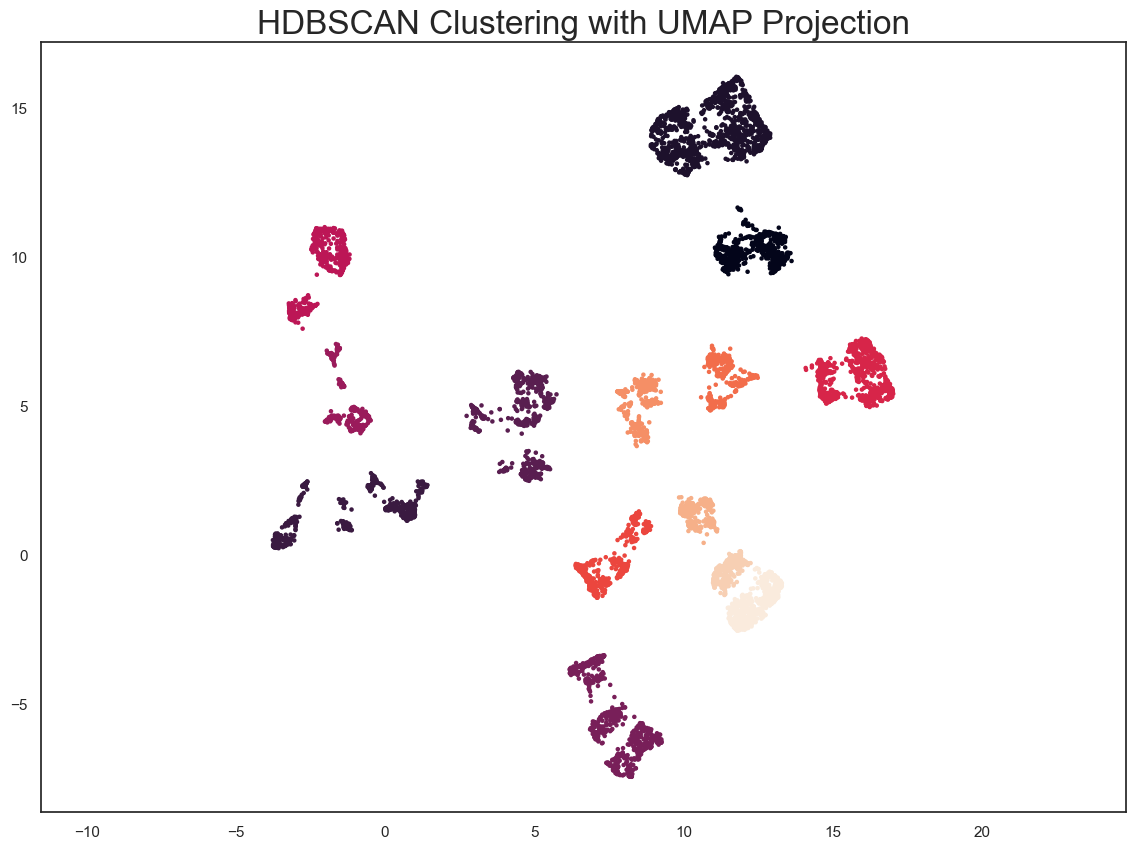

The average silhouette_score is : 0.6153493


In [34]:
from sklearn.metrics import silhouette_score

hdb = HDBSCAN(min_samples=1, min_cluster_size=250)

cluster_labels = hdb.fit_predict(spending_umap)

spending_data['cluster_label'] = cluster_labels

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    s=5,
    c=cluster_labels,  # Assign colors based on cluster labels using the colormap
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('HDBSCAN Clustering with UMAP Projection', fontsize=24)
plt.show()

spending_data['cluster_label'].value_counts()

silhouette_avg = silhouette_score(spending_umap, cluster_labels)

print("The average silhouette_score is :", silhouette_avg)

### Implementing DBSCAN

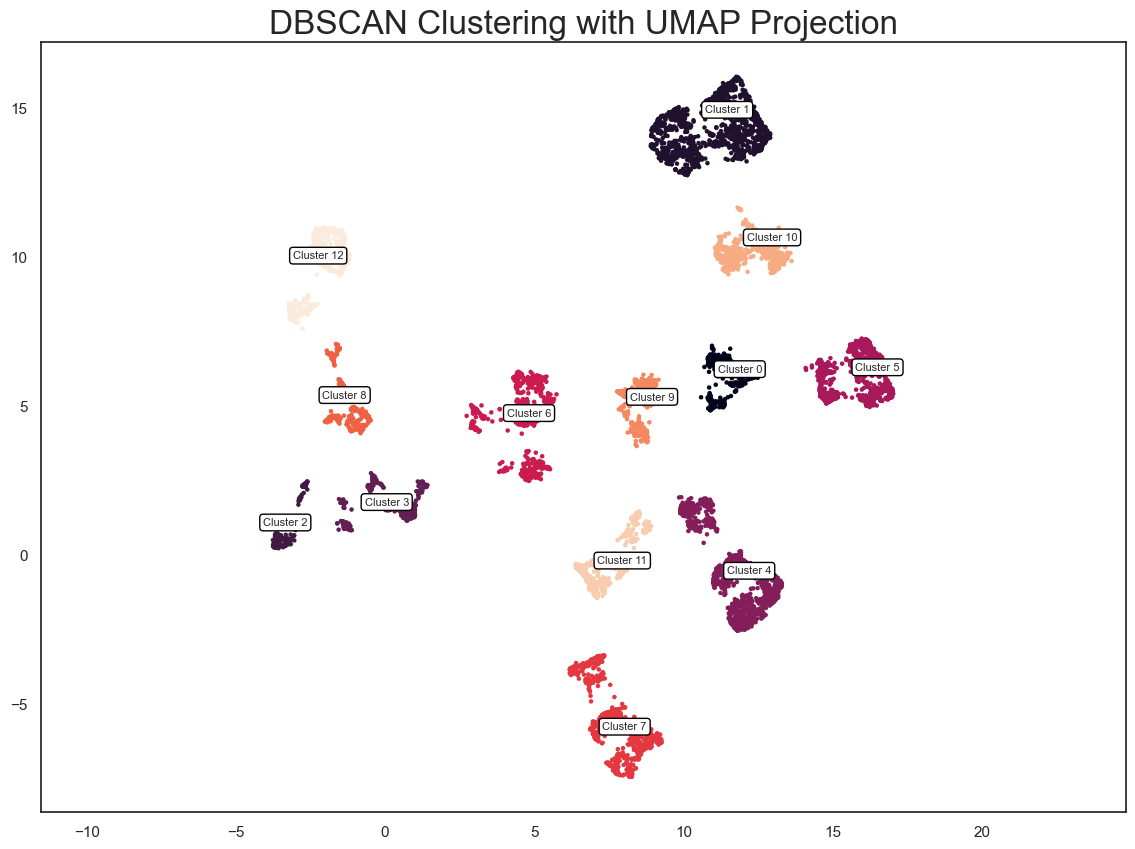

The average silhouette_score is : 0.6324241


In [70]:
from sklearn.metrics import silhouette_score

db = DBSCAN(min_samples=10, eps=1)

cluster_labels = db.fit_predict(spending_umap)

spending_data['cluster_label'] = cluster_labels

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    s=5,
    c=cluster_labels,
)

for label in np.unique(cluster_labels):
    if label == -1:
        continue
    cluster_center = np.mean(spending_umap[cluster_labels == label], axis=0)
    plt.annotate(
        f'Cluster {label}',
        xy=cluster_center,
        xytext=(cluster_center[0], cluster_center[1]),
        textcoords="offset points",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white')
    )

plt.gca().set_aspect('equal', 'datalim')
plt.title('DBSCAN Clustering with UMAP Projection', fontsize=24)
plt.show()
spending_data['cluster_label'].value_counts()


silhouette_avg = silhouette_score(spending_umap, cluster_labels)

print("The average silhouette_score is :", silhouette_avg)

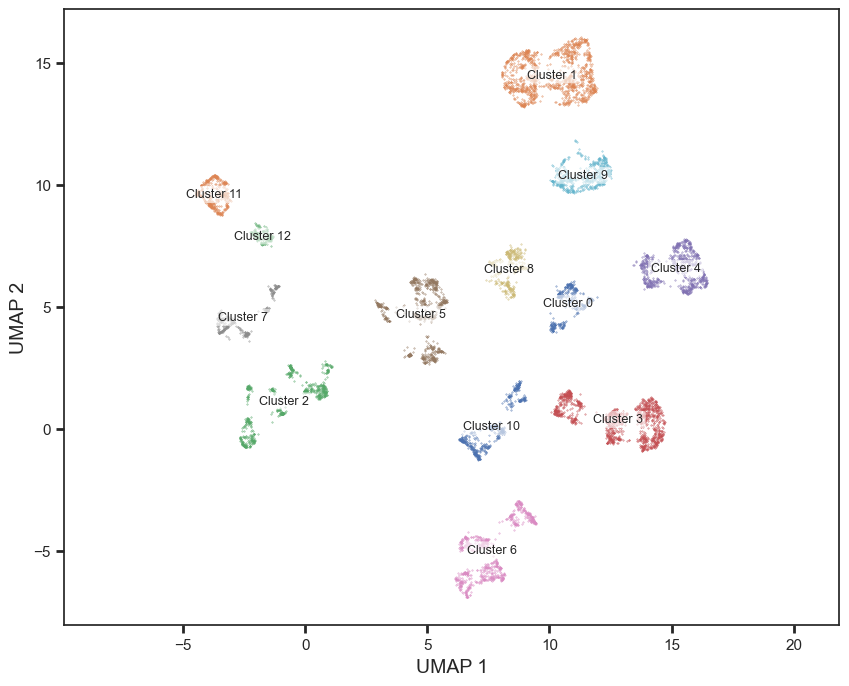

cluster_label
1     1241
4     1172
7      802
6      769
5      762
10     580
12     566
11     515
3      433
0      371
9      349
8      343
2      239
Name: count, dtype: int64
The average silhouette score is: 0.63447464


In [254]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
sns.set(style='ticks', rc={'figure.figsize':(14,10)})

db = DBSCAN(min_samples=10, eps=1)

cluster_labels = db.fit_predict(spending_umap)

plt.figure(figsize=(10, 8))
for label in np.unique(cluster_labels):
    if label == -1:
        continue
    cluster_points = spending_umap[cluster_labels == label]
    cluster_center = np.mean(cluster_points, axis=0)
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        s=0.1,
    )

    plt.text(
        cluster_center[0],  
        cluster_center[1], 
        f'Cluster {label}', 
        fontsize=9, 
        ha='center', 
        va='center', 
        bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.6, edgecolor='none')
    )

plt.gca().set_aspect('equal', 'datalim')
plt.tick_params(axis='both', direction='out', length=6, width=2)
plt.xlabel('UMAP 1', fontsize=14)
plt.ylabel('UMAP 2', fontsize=14)
plt.savefig("UMAP with DBSCAN.png")
plt.show()

print(spending_data['cluster_label'].value_counts())

silhouette_avg = silhouette_score(spending_umap, cluster_labels)
print("The average silhouette score is:", silhouette_avg)


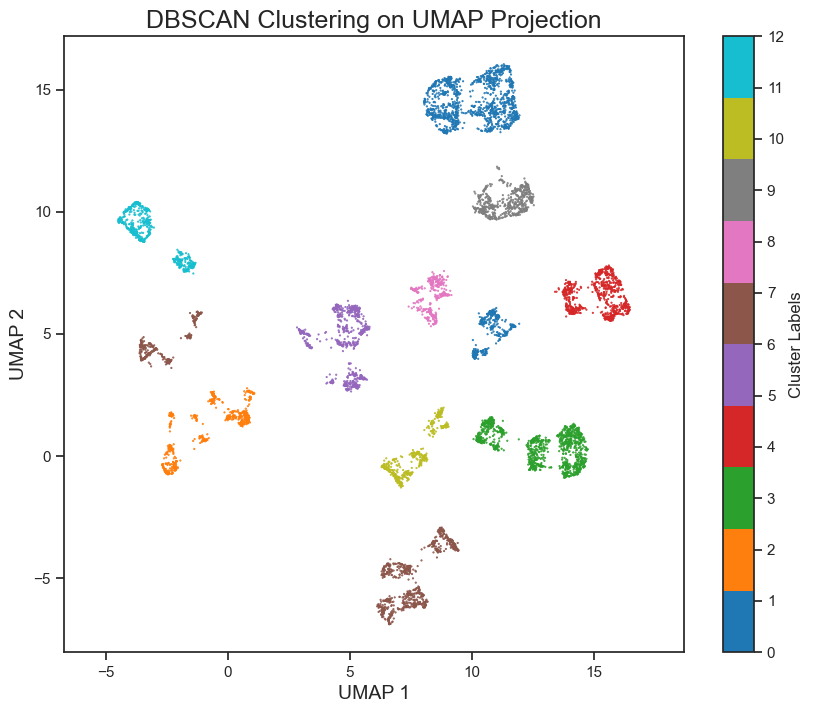

cluster_label
1     1241
4     1172
7      802
6      769
5      762
10     580
12     566
11     515
3      433
0      371
9      349
8      343
2      239
Name: count, dtype: int64
The average silhouette score is: 0.63447464


In [247]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

db = DBSCAN(min_samples=10, eps=1)

cluster_labels = db.fit_predict(spending_umap)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    c=cluster_labels,  # Assign colors based on cluster labels
    cmap='tab10',  # Choose a colormap
    s=0.3,
    label=[f'Cluster {label}' for label in np.unique(cluster_labels) if label != -1]  # Label each cluster separately
)

plt.gca().set_aspect('equal', 'datalim')

plt.title('DBSCAN Clustering on UMAP Projection', fontsize=18)
plt.xlabel('UMAP 1', fontsize=14)
plt.ylabel('UMAP 2', fontsize=14)

# Create a color bar
cbar = plt.colorbar(scatter, ticks=np.arange(cluster_labels.min(), cluster_labels.max() + 1))
cbar.ax.set_ylabel('Cluster Labels')

plt.savefig("UMAP with DBSCAN.png")
plt.show()

print(spending_data['cluster_label'].value_counts())

silhouette_avg = silhouette_score(spending_umap, cluster_labels)
print("The average silhouette score is:", silhouette_avg)

#### Plotting accounts within UMAP clusters

In [71]:
cluster_of_interest = 3

accounts_in_cluster = spending_data[spending_data['cluster_label'] == cluster_of_interest]
sample_accounts = accounts_in_cluster.sample(n=6)

sample_accounts.set_index('Sender account', inplace=True)
sample_accounts

,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label
Sender account,,,,,,,,,,,,,,,
14601.0,0.824163,-0.288632,1.549674,-0.731424,1.532790,-0.491718,-1.057218,-0.335033,-1.068088,-0.395954,1.234822,1.691471,-0.384490,-0.901511,3
13054.0,-0.323082,-1.089963,-0.531975,-0.202917,1.578650,-0.651725,-0.084794,-0.335033,0.313427,-0.395954,1.466904,2.305954,-0.261731,-1.151751,3
87068.0,0.846283,-0.644831,-0.630156,-0.602494,1.376971,-0.292125,0.876690,-0.335033,-0.008367,-0.395954,1.491719,0.475478,-0.310611,-1.097351,3
82958.0,-0.236312,-0.937853,0.375395,-0.731424,1.565038,-0.419120,0.239747,-0.335033,0.394702,-0.232928,1.634978,0.864396,-0.384490,-1.099208,3
19949.0,-1.042051,0.479772,-0.695943,-0.510052,1.642045,-0.367790,-0.581123,-0.335033,-0.306311,-0.395954,1.483728,-0.464270,-0.384490,-1.000461,3
75715.0,-1.042051,-1.214567,0.651430,0.911632,1.364395,0.909879,-1.523128,-0.335033,-1.137292,-0.246355,1.164775,1.878922,-0.384490,-1.218506,3


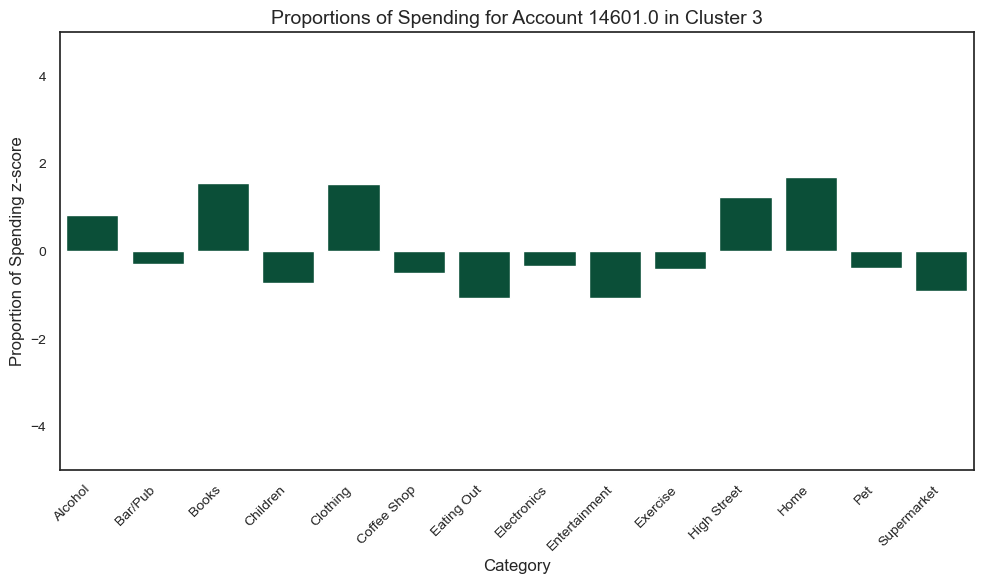

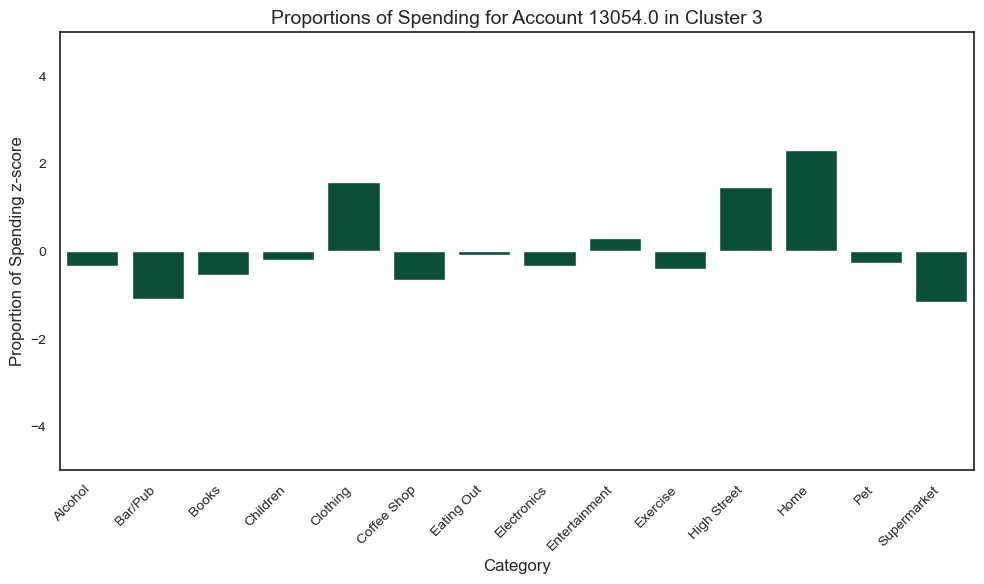

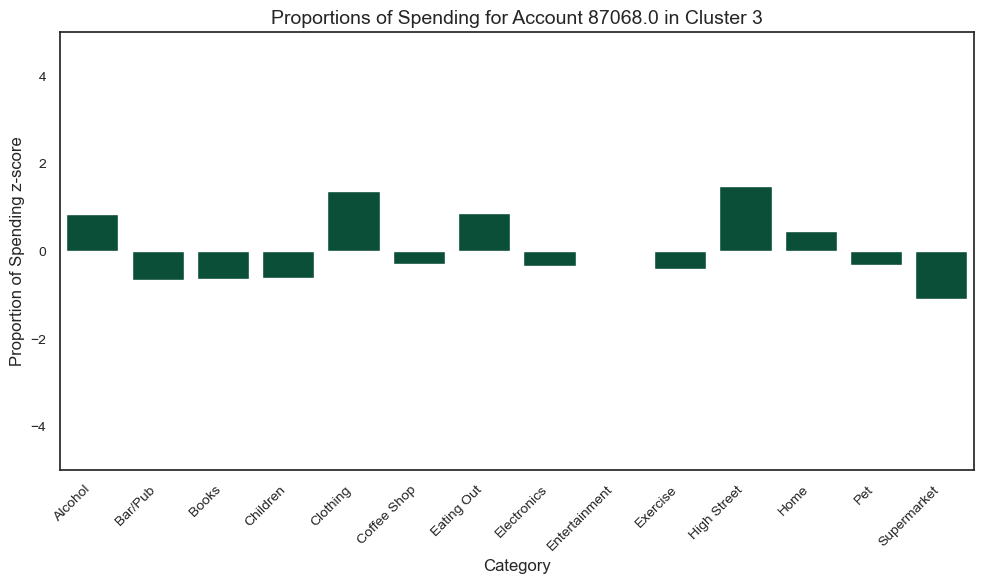

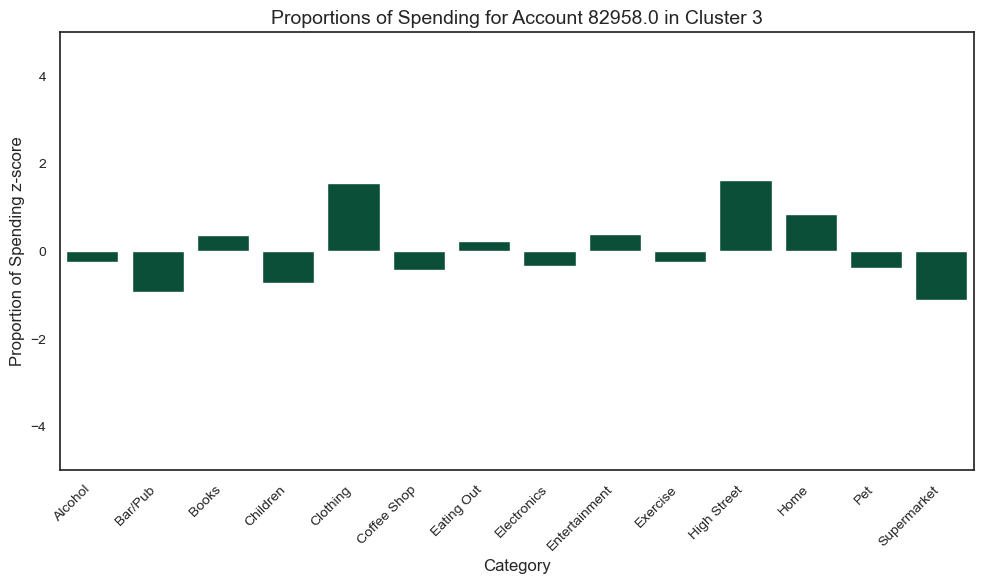

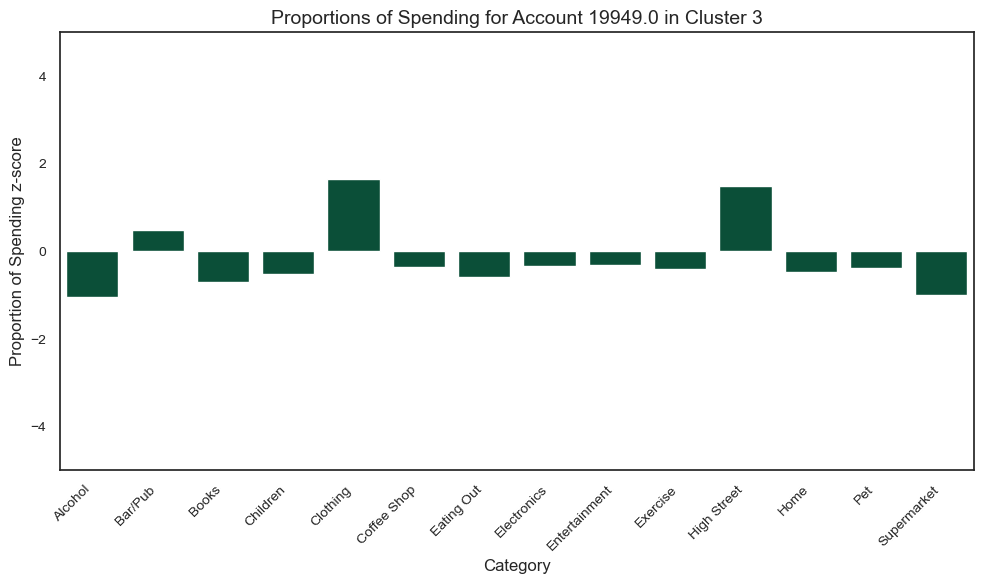

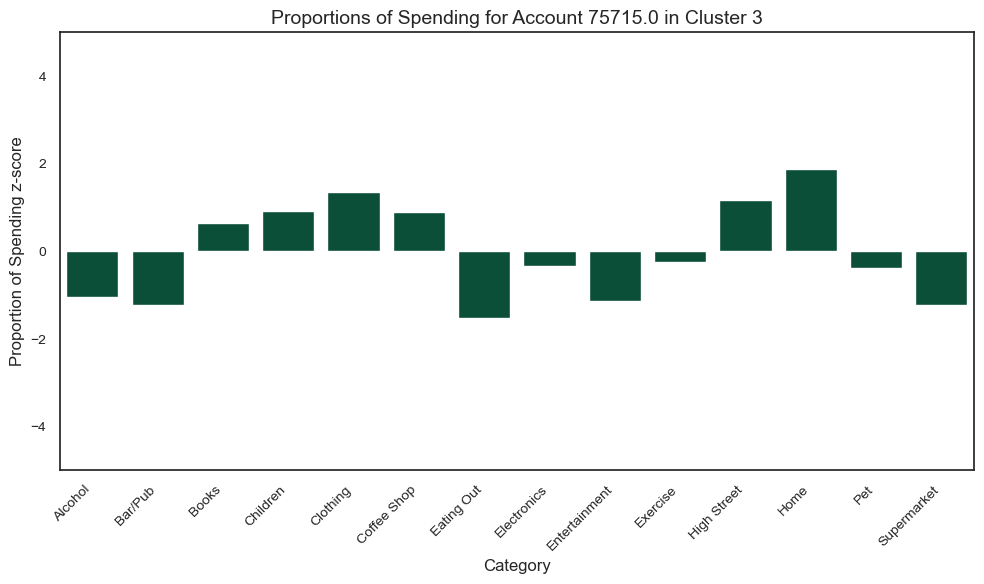

In [72]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=account_data.index[:-1], y=account_data.values[:-1], color='#005a3c')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}', fontsize=14)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Proportion of Spending z-score', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(-5, 5)
    plt.tight_layout()
    plt.show()

Labelling clusters with insights

In [33]:
cluster_names = [
    'High Coffee Low Clothing Low High-Street',
    'High Bar/Pub',
    'Low Supermarket High Highstreet High Children',
    'Low Supermarket High Highstreet',
    'High Clothing High Home',
    'High Children',
    'High Clothing High Coffeeshop',
    'Low Supermarket High Highstreet High Bar/Pub',
    'High Clothing High Children Low Bar/Pub',
    'Low Supermarket High Highstreet High Coffeshop',
    'High Children High Coffeeshop',
    'Low Supermarket High Highstreet High Coffeshop High Clothing'
]

In [130]:
spending_data['cluster_name'] = spending_data['cluster_label'].apply(lambda x: cluster_names[x])

In [138]:
spending_data.describe()

,Sender account,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label
count,8142.000000,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8142.000000
mean,50826.578605,-2.242809e-16,-4.996140e-17,2.247172e-17,8.508710e-17,-1.876280e-17,-2.138086e-16,3.534387e-17,8.377807e-17,2.011546e-16,9.250495e-17,-3.752559e-17,2.443527e-17,-5.236129e-18,1.448662e-16,5.635716
std,28946.392695,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,3.579644
min,1000.000000,-1.042051e+00,-2.896347e+00,-6.959426e-01,-7.314238e-01,-8.144134e-01,-1.284410e+00,-2.286177e+00,-3.350334e-01,-1.177129e+00,-3.959542e-01,-6.554928e-01,-8.390661e-01,-3.844903e-01,-1.561700e+00,0.000000
25%,25450.250000,-7.879016e-01,-7.267744e-01,-6.650930e-01,-6.957986e-01,-7.618667e-01,-5.900837e-01,-7.386377e-01,-3.350334e-01,-9.246153e-01,-3.959542e-01,-6.098106e-01,-8.390661e-01,-3.844903e-01,-8.997708e-01,3.000000
50%,50860.500000,-2.588866e-01,-1.087238e-01,-5.934202e-01,-5.729304e-01,-5.249840e-01,-3.159922e-01,-1.915174e-01,-3.350334e-01,-5.878521e-02,-3.959542e-01,-5.529379e-01,-4.937834e-01,-3.844903e-01,-3.185652e-01,5.000000
75%,75606.750000,5.079061e-01,5.966526e-01,7.663635e-01,9.181048e-01,8.444169e-01,2.713502e-01,5.648121e-01,-3.350334e-01,5.897094e-01,-1.677861e-01,-9.079269e-02,6.893745e-01,-2.156672e-01,8.708178e-01,8.000000
max,100988.000000,7.023502e+00,4.031982e+00,4.642094e+00,4.011184e+00,4.002967e+00,4.072837e+00,4.720008e+00,1.027473e+01,4.233562e+00,6.611754e+00,4.160499e+00,5.659606e+00,8.486626e+00,2.852160e+00,12.000000


### Distribution of categories within each cluster

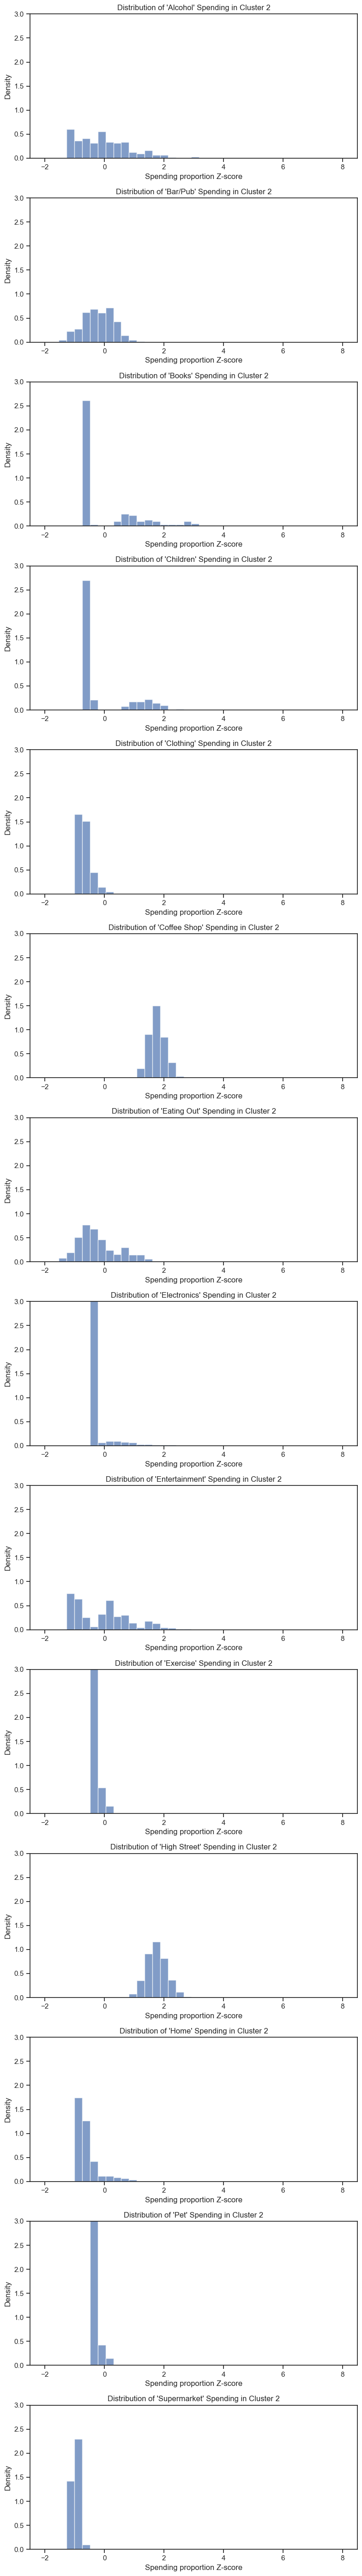

In [262]:
cluster = 2

cluster_data = spending_data[spending_data['cluster_label'] == cluster]

categories = cluster_data.drop(['Sender account', 'cluster_label'], axis=1).columns

fig, axs = plt.subplots(len(categories), 1, figsize=(8, len(categories)*4))

min_value = cluster_data[categories].min().min()
max_value = cluster_data[categories].max().max()

num_bins = 20

bin_edges = np.linspace(min_value, max_value, num_bins+1)

for i, category in enumerate(cluster_data.drop(['Sender account', 'cluster_label'], axis=1).columns):

    axs[i].hist(cluster_data[category], bins=bin_edges, density=True, alpha=0.7)
    axs[i].set_title(f"Distribution of '{category}' Spending in Cluster {cluster}")
    axs[i].set_xlabel('Spending proportion Z-score')
    axs[i].set_ylabel('Density')
    axs[i].set_xlim(-2.5, 8.5)
    axs[i].set_ylim(0, 3)
plt.tight_layout()
plt.show()

Plotting specific categories for report

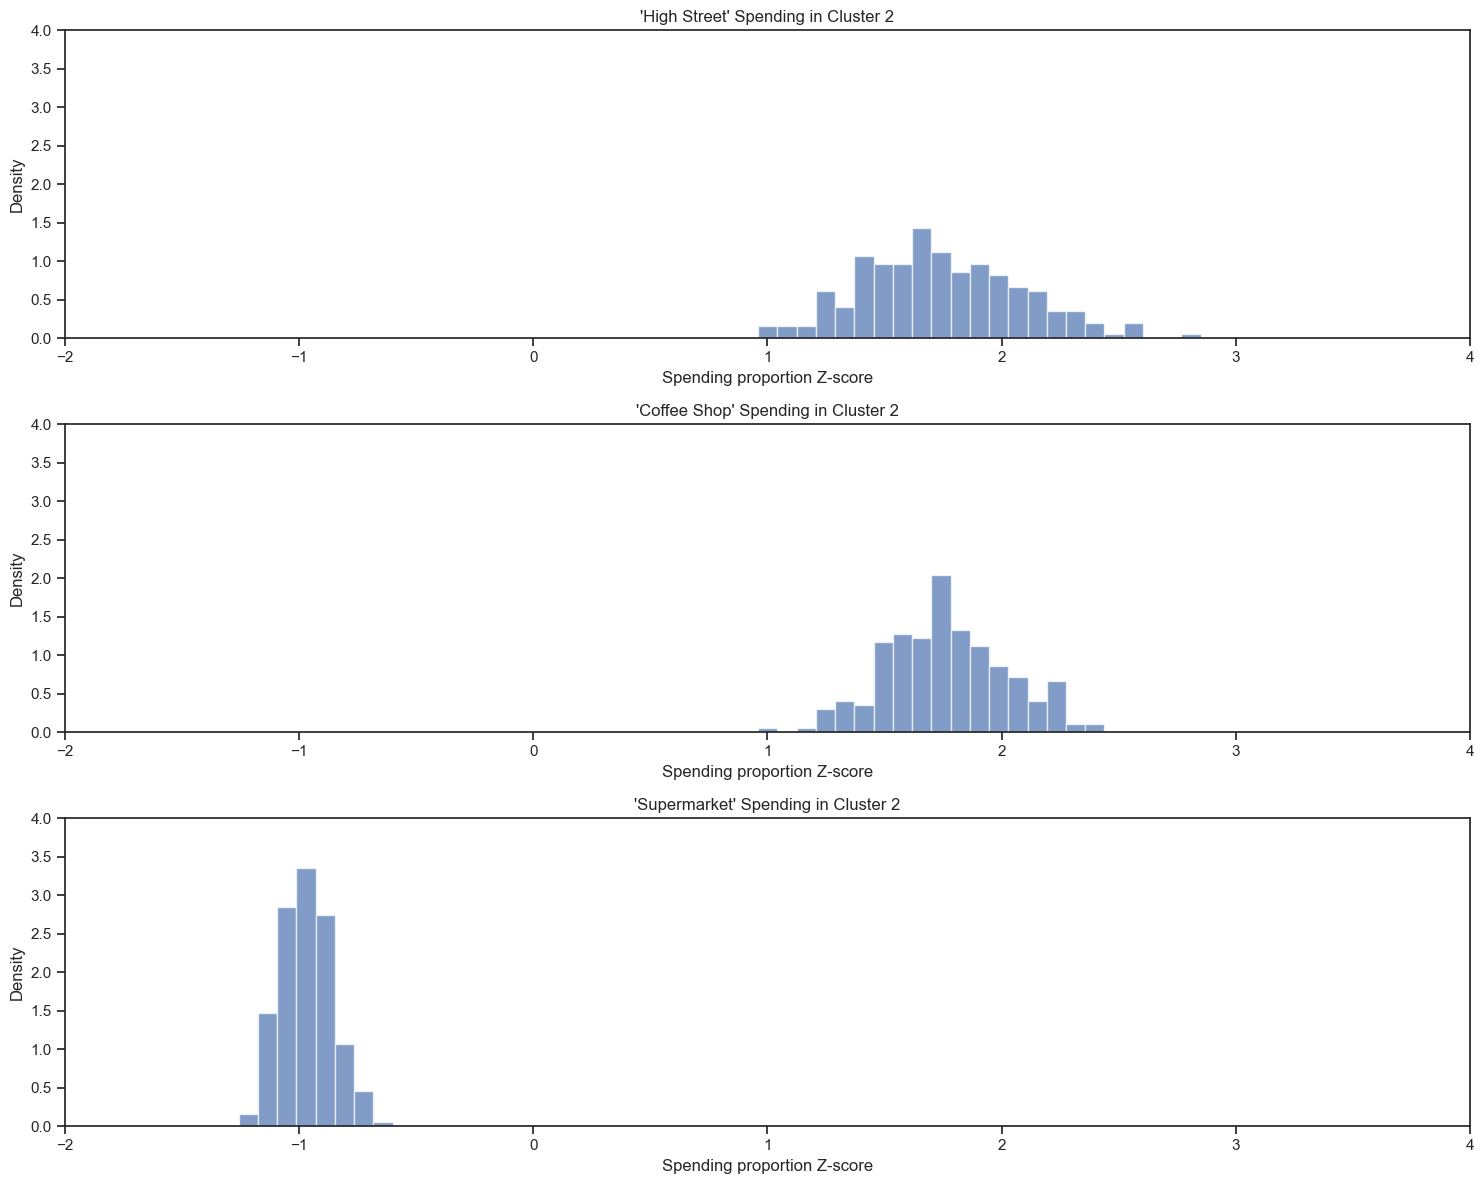

In [284]:
cluster = 2

cluster_data = spending_data[spending_data['cluster_label'] == cluster]

chosen_categories = ['High Street', 'Coffee Shop', 'Supermarket']

fig, axs = plt.subplots(len(chosen_categories), 1, figsize=(15, len(chosen_categories)*4))

min_value = cluster_data[chosen_categories].min().min()
max_value = cluster_data[chosen_categories].max().max()

num_bins = 50

bin_edges = np.linspace(min_value, max_value, num_bins+1)

for i, category in enumerate(chosen_categories):

    axs[i].hist(cluster_data[category], bins=bin_edges, density=True, alpha=0.7)
    axs[i].set_title(f"'{category}' Spending in Cluster {cluster}")
    axs[i].set_xlabel('Spending proportion Z-score')
    axs[i].set_ylabel('Density')
    axs[i].set_xlim(-2, 4)
    axs[i].set_ylim(0, 4)
plt.tight_layout()
plt.show()

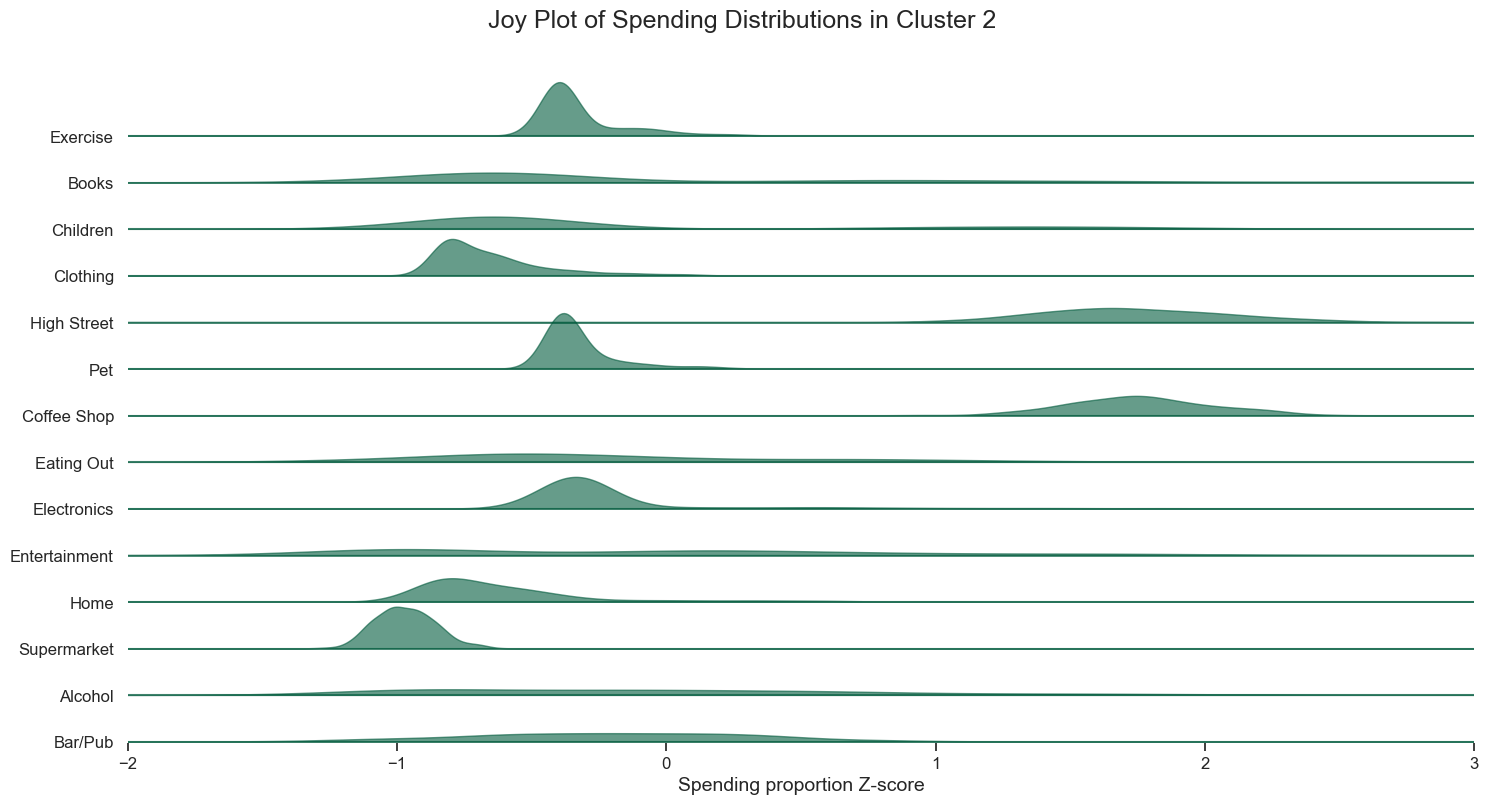

In [388]:
import joypy

cluster = 2
cluster_data = spending_data[spending_data['cluster_label'] == cluster]
categories = cluster_data.drop(['Sender account', 'cluster_label'], axis=1).columns
categories = ['Exercise', 'Books', 'Children', 'Clothing',  'High Street', 'Pet', 'Coffee Shop',
       'Eating Out', 'Electronics', 'Entertainment',
       'Home', 'Supermarket', 'Alcohol', 'Bar/Pub']

fig, axes = joypy.joyplot(cluster_data[categories], figsize=(15, 8), alpha=0.6, linecolor = "none", color='#005a3c')
for ax in axes:
    ax.set_ylim(-0.1, 10)
    ax.set_xlim(-2,3)
    ax.set_xticks(range(-2,4))
plt.suptitle(f'Joy Plot of Spending Distributions in Cluster {cluster}', fontsize=18)
plt.xlabel('Spending proportion Z-score', fontsize=14)
plt.show()

In [267]:
categories = cluster_data.drop(['Sender account', 'cluster_label'], axis=1).columns


Index(['Alcohol', 'Bar/Pub', 'Books', 'Children', 'Clothing', 'Coffee Shop',
       'Eating Out', 'Electronics', 'Entertainment', 'Exercise', 'High Street',
       'Home', 'Pet', 'Supermarket'],
      dtype='object')


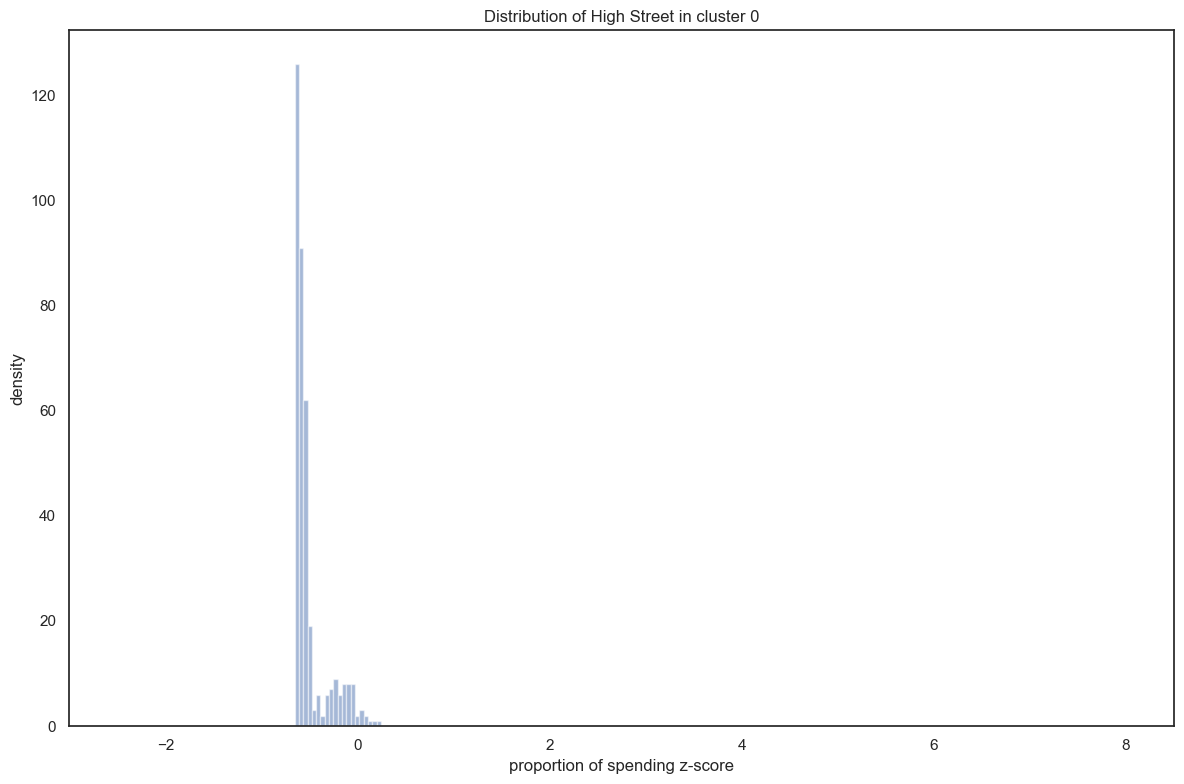

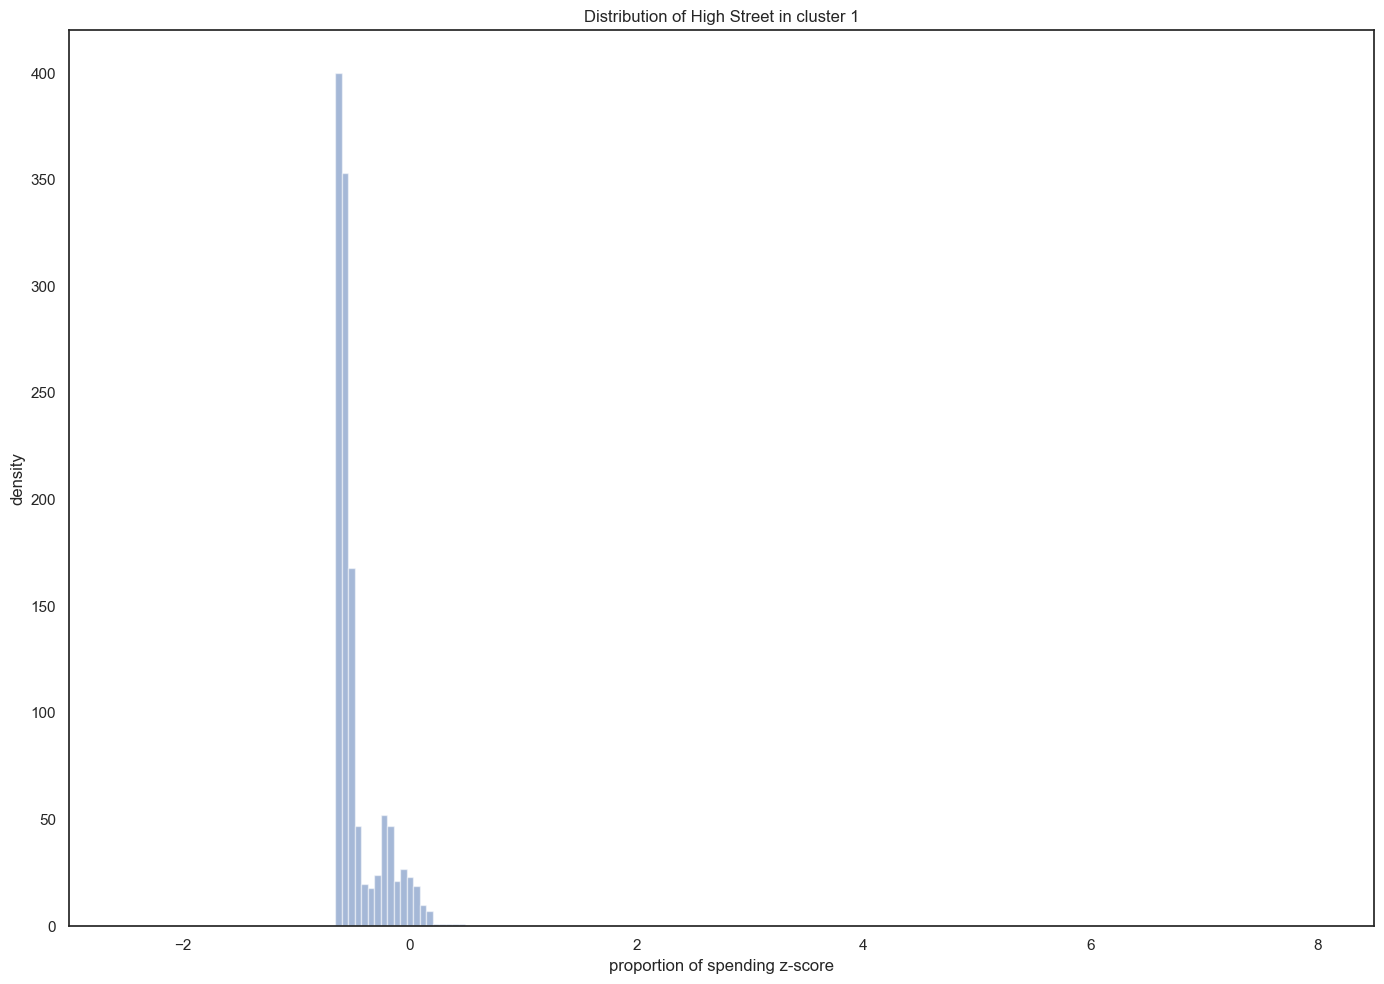

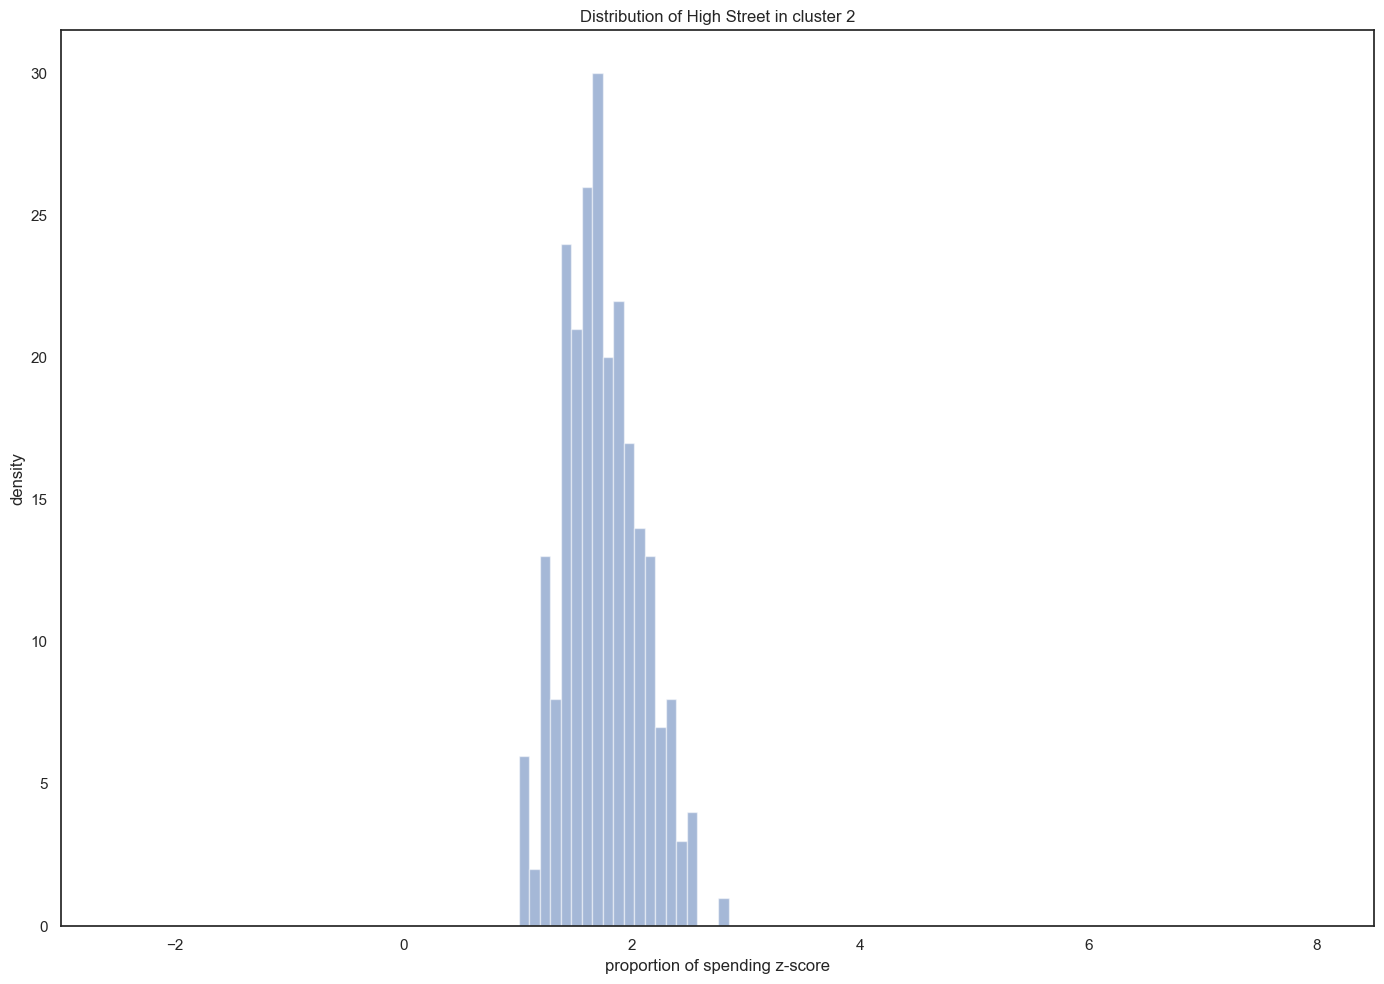

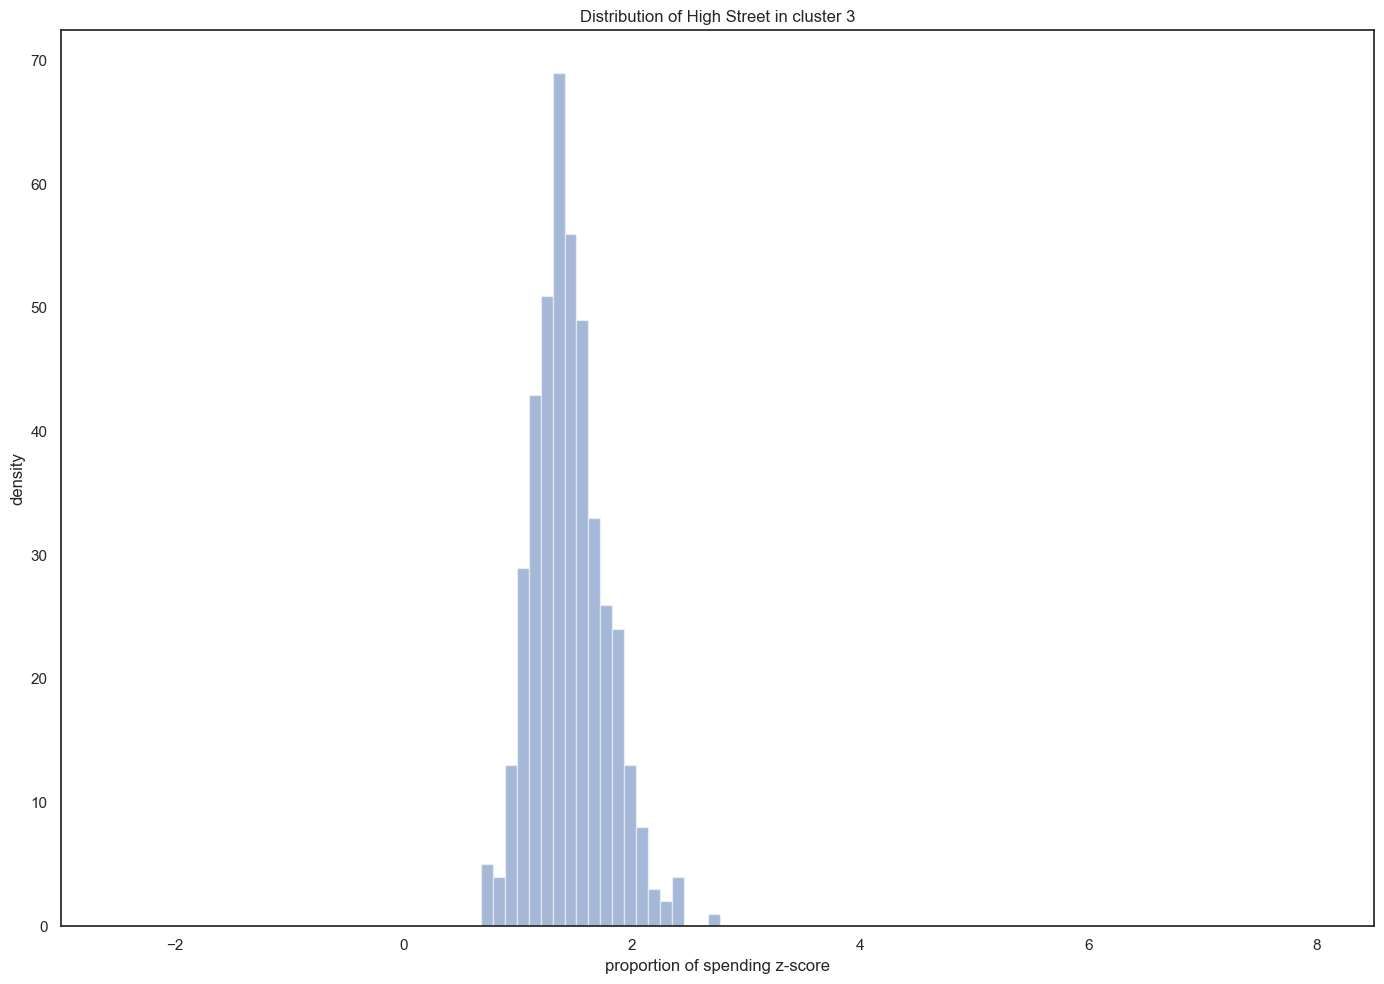

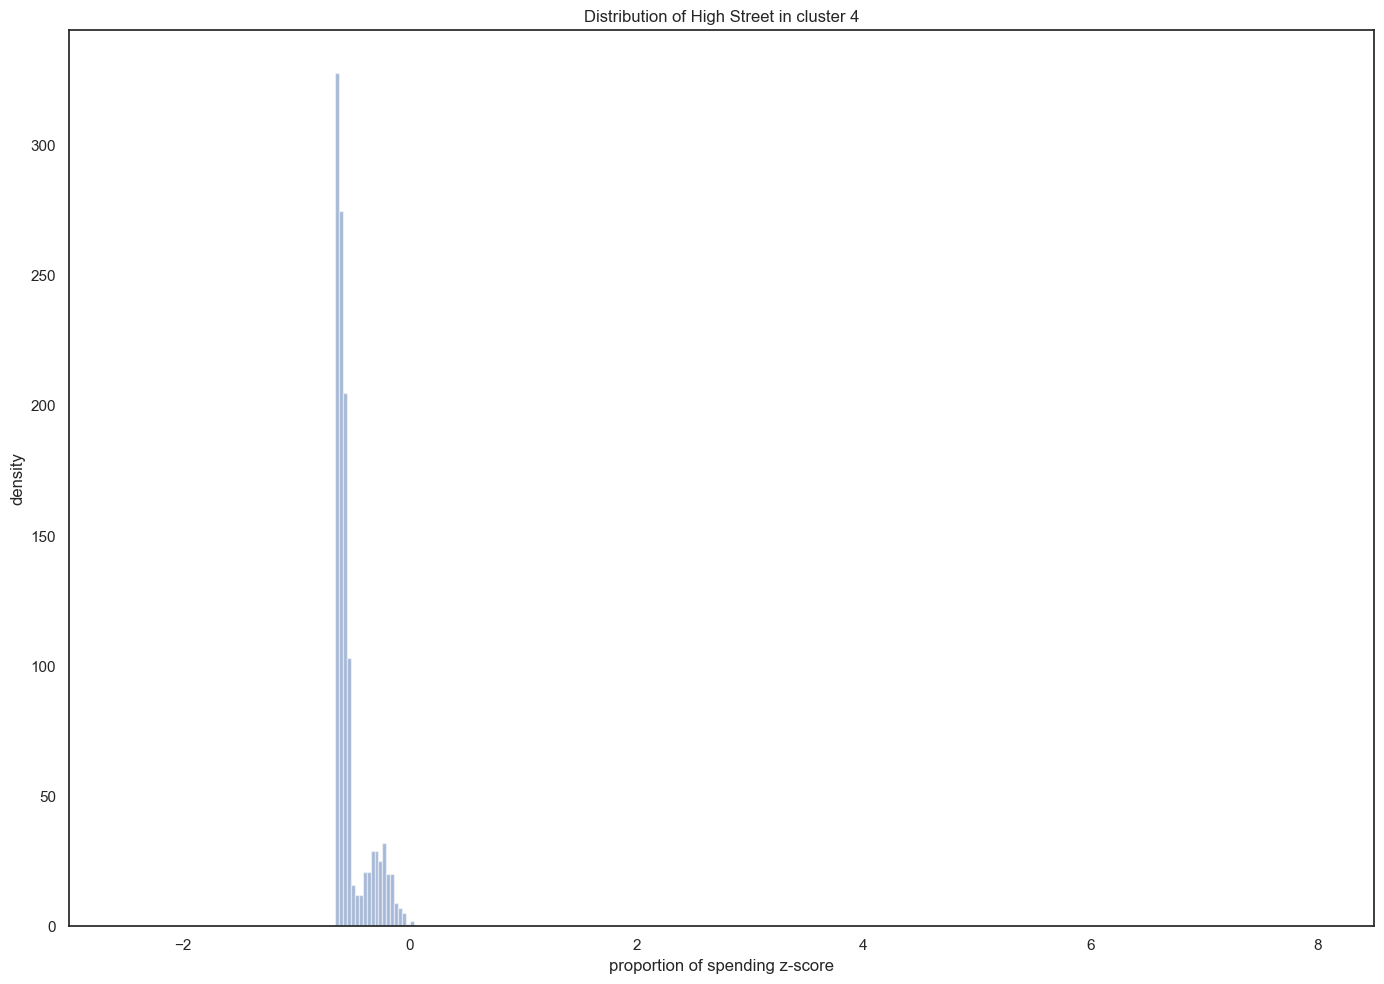

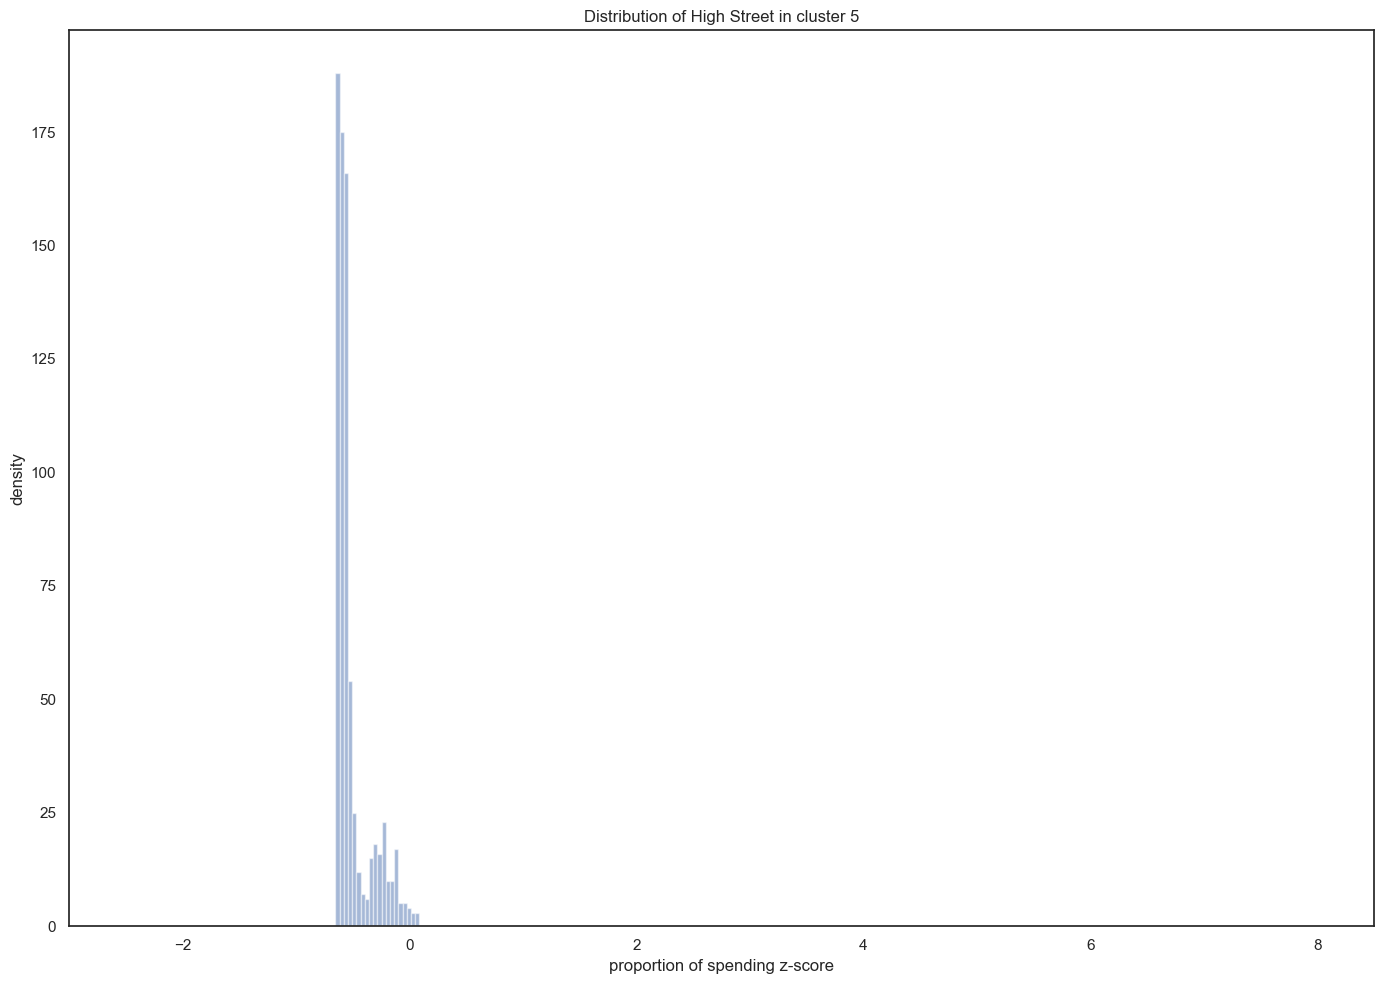

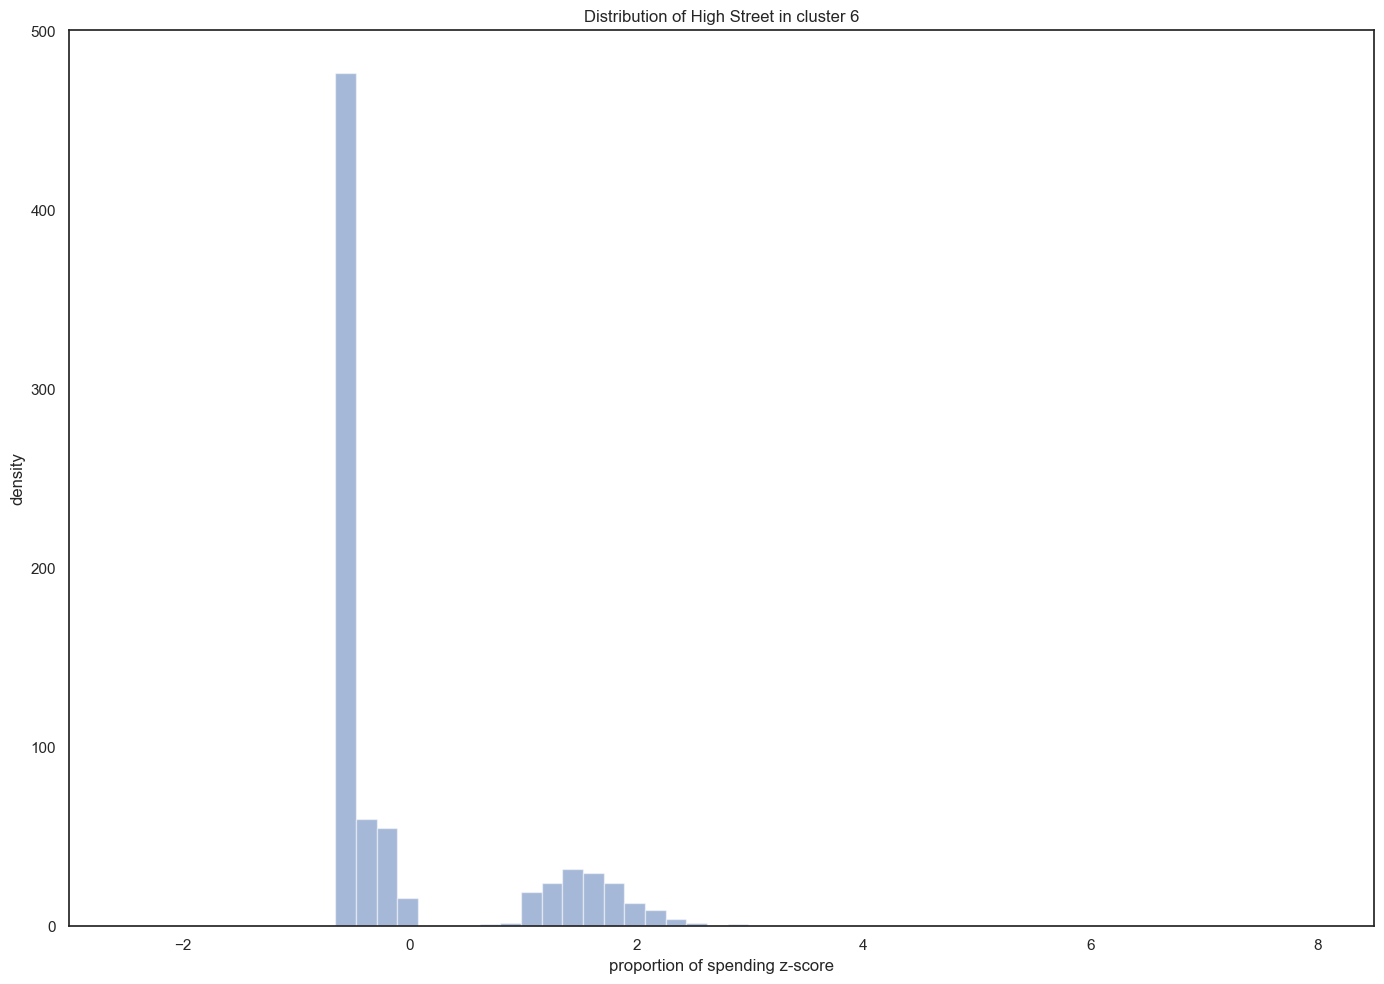

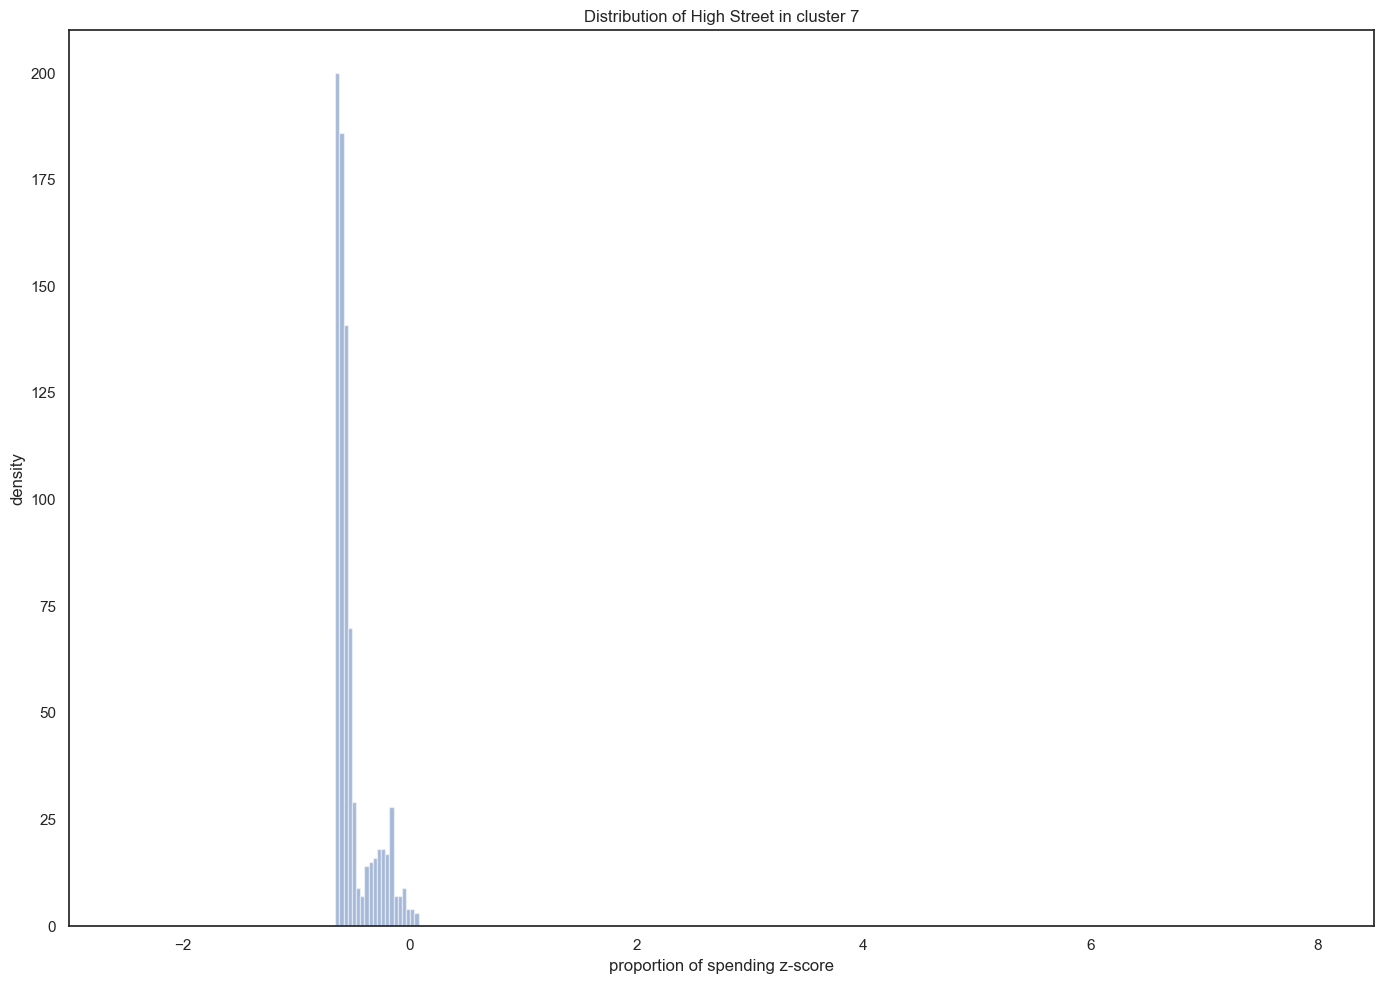

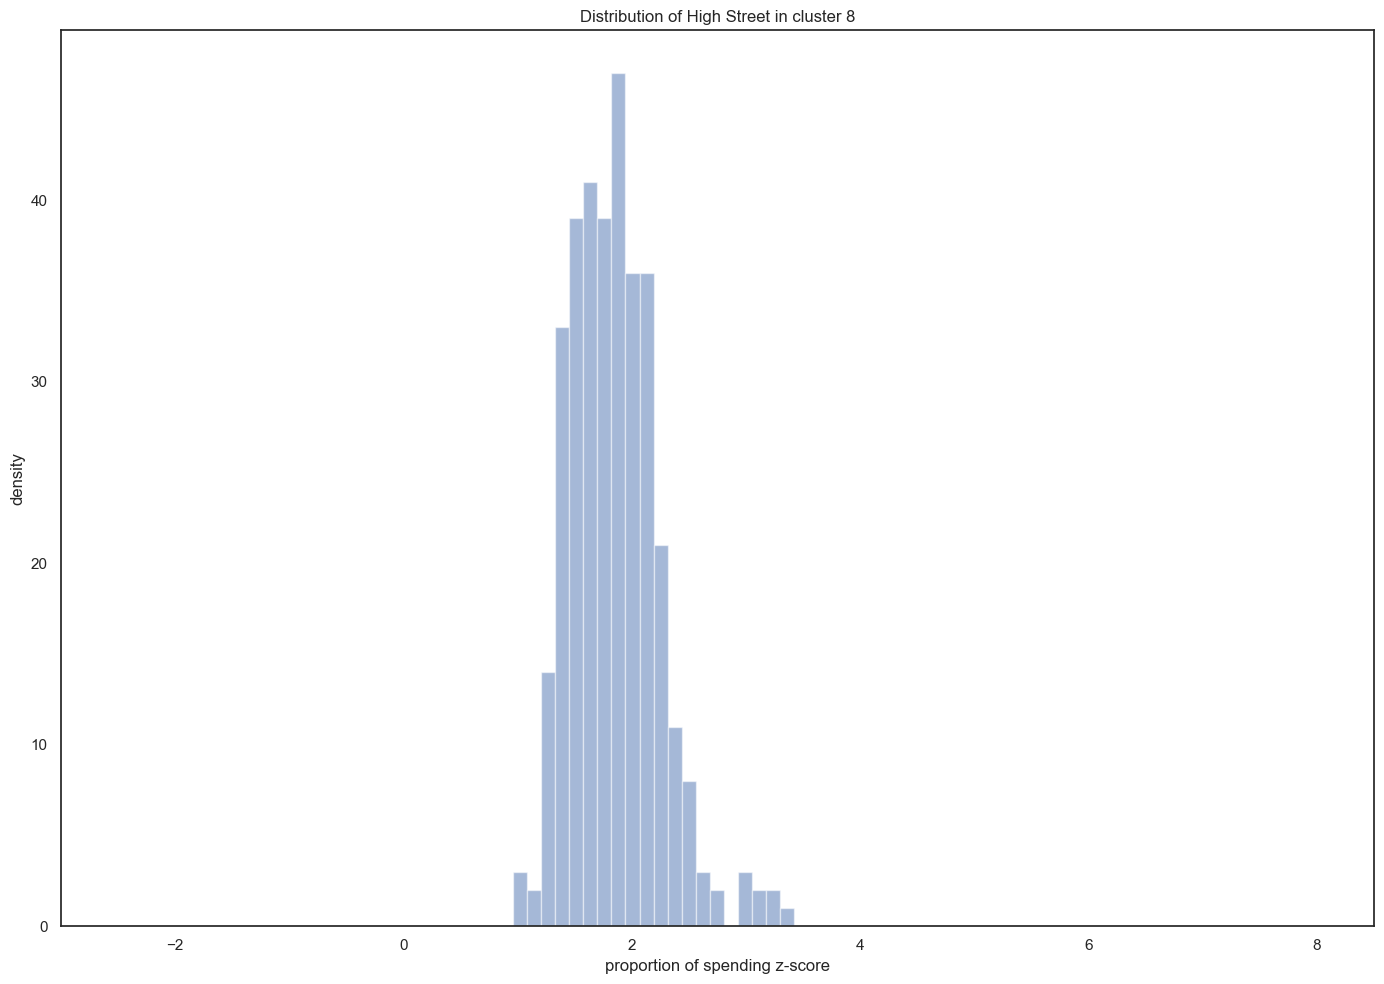

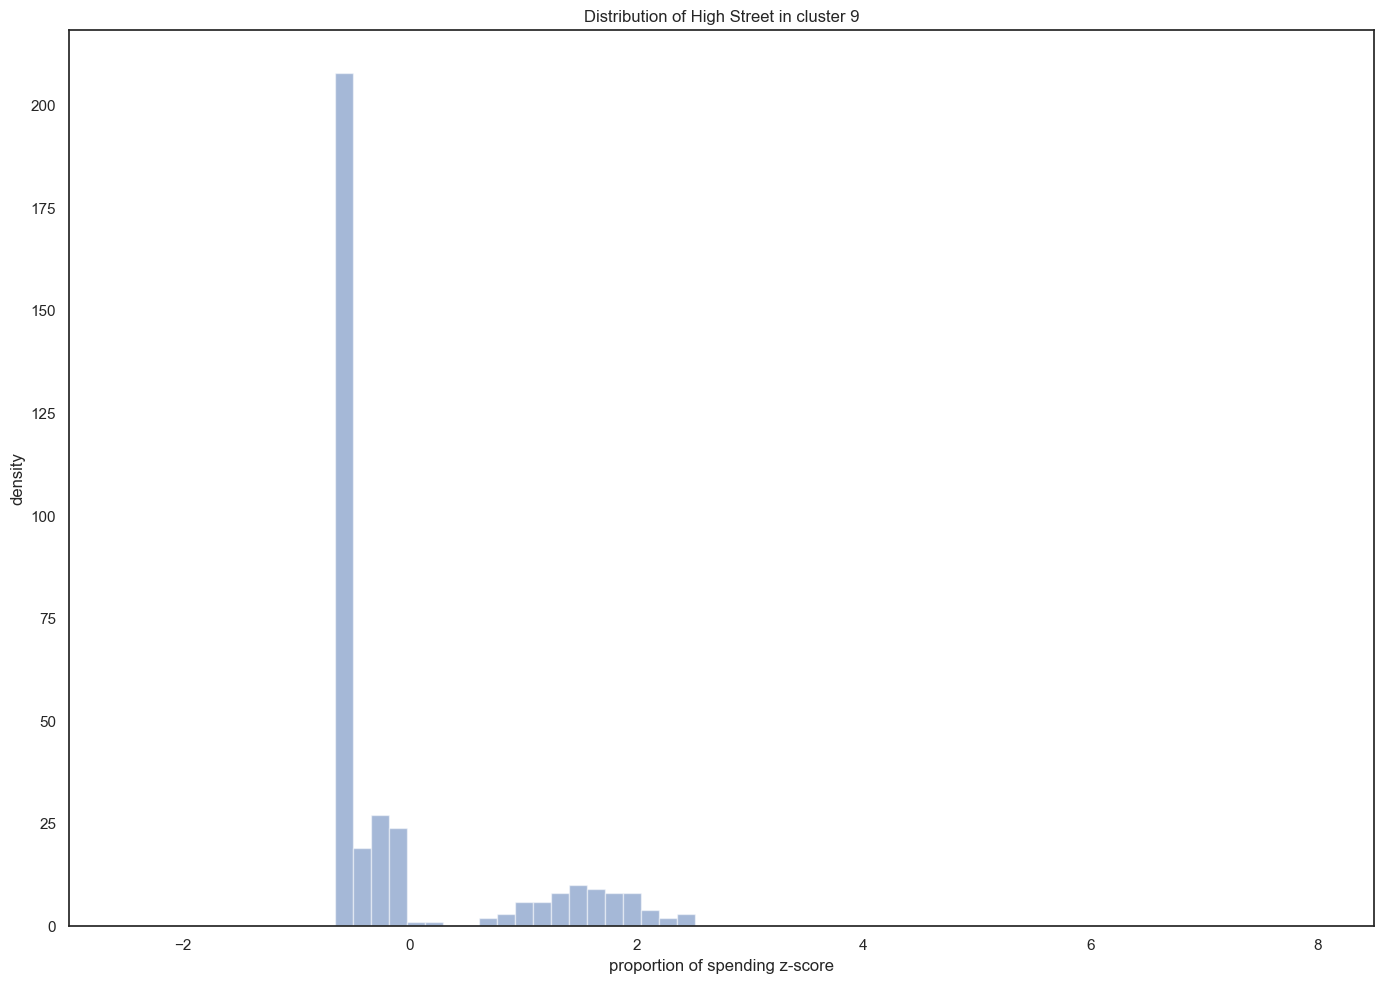

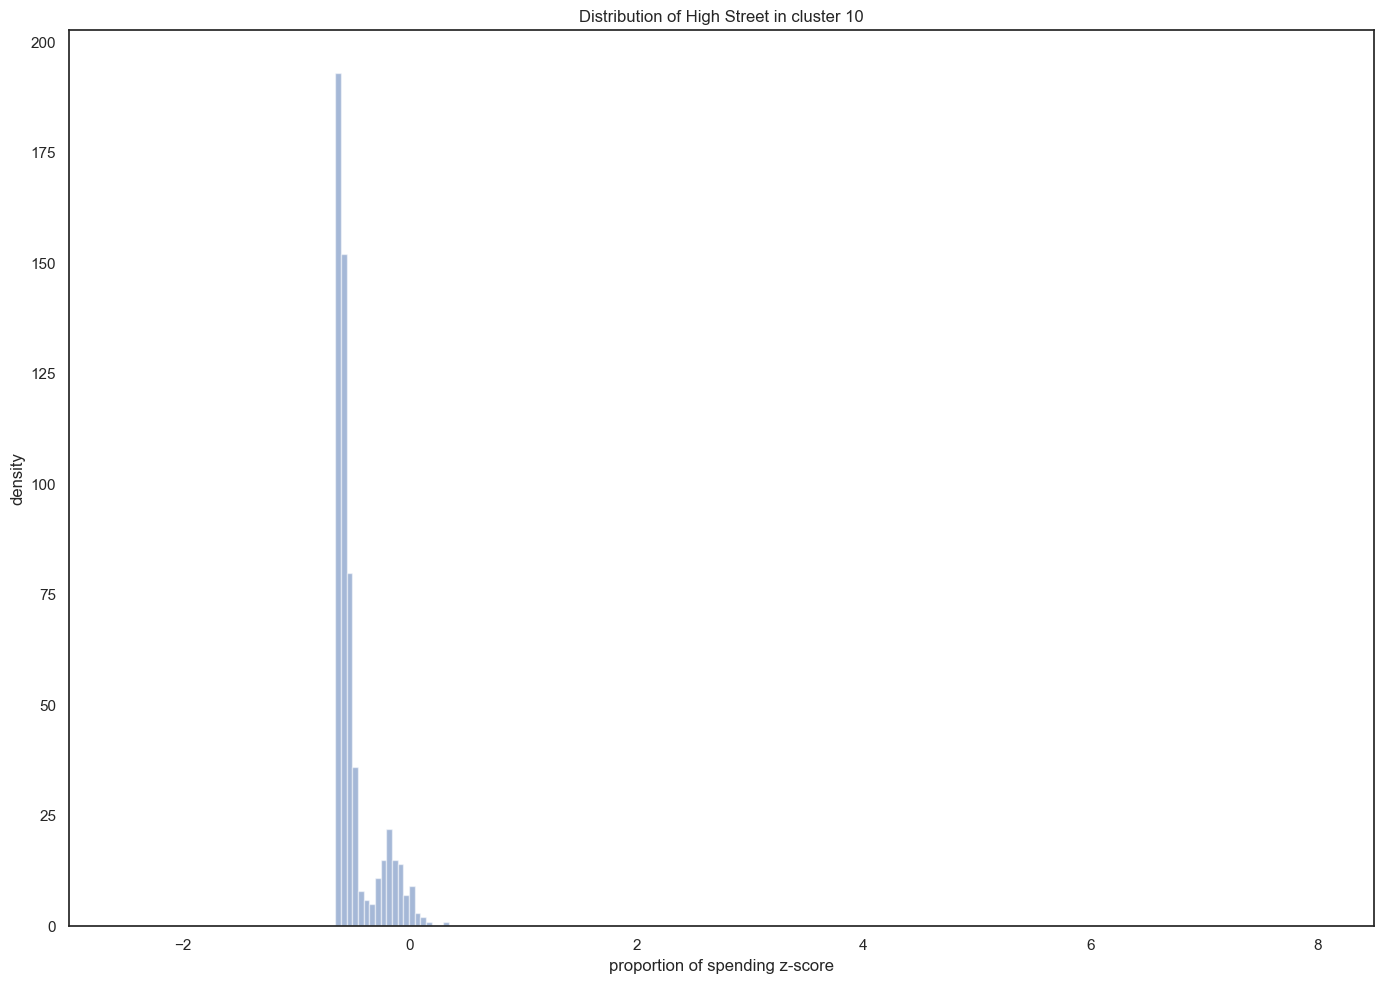

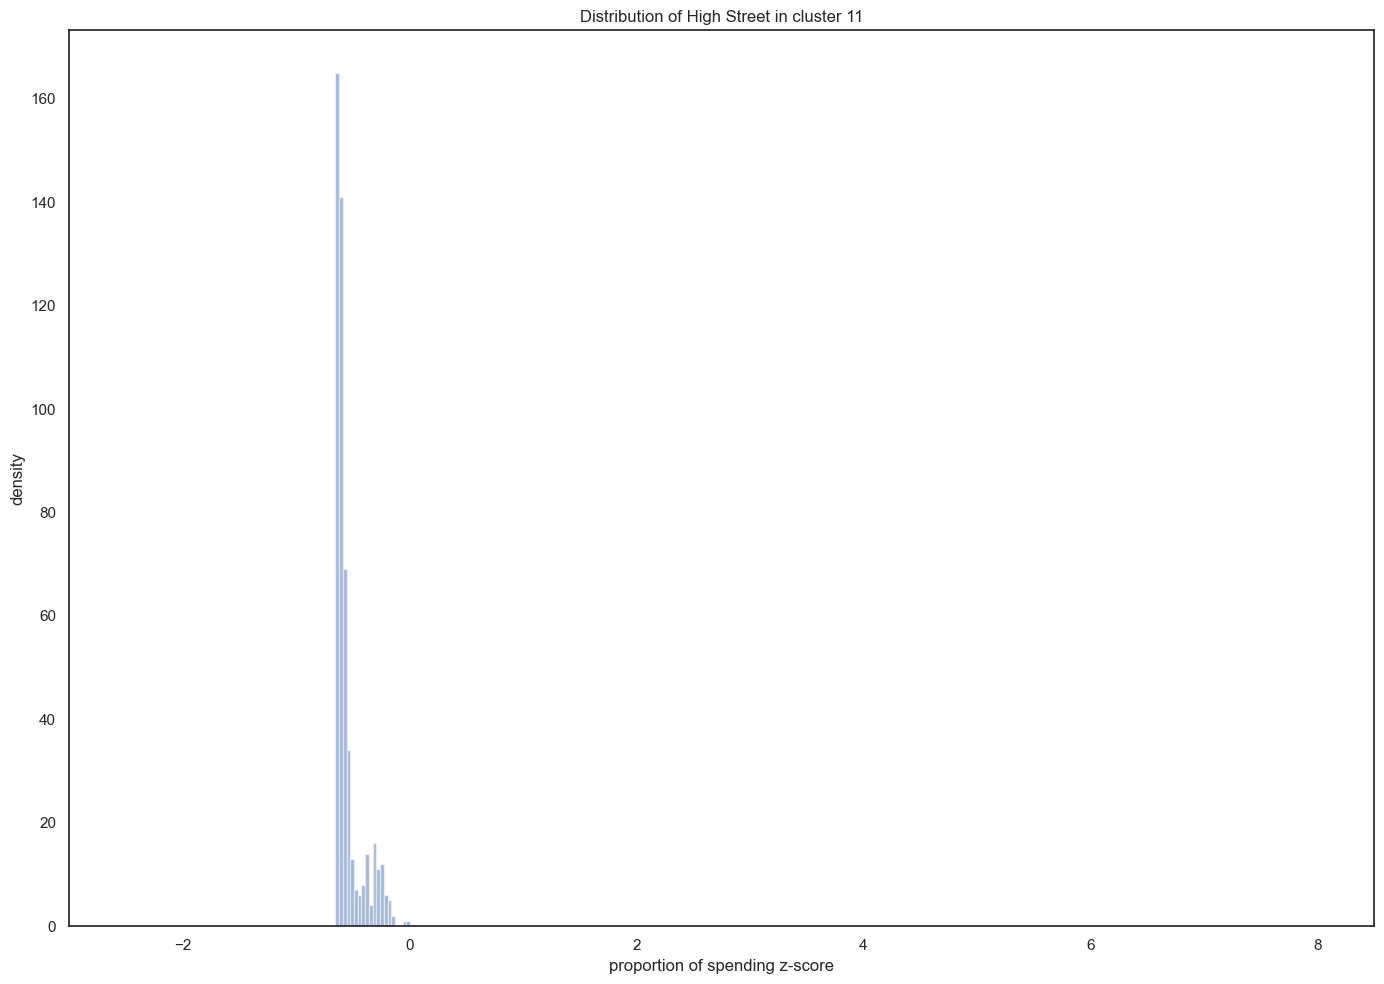

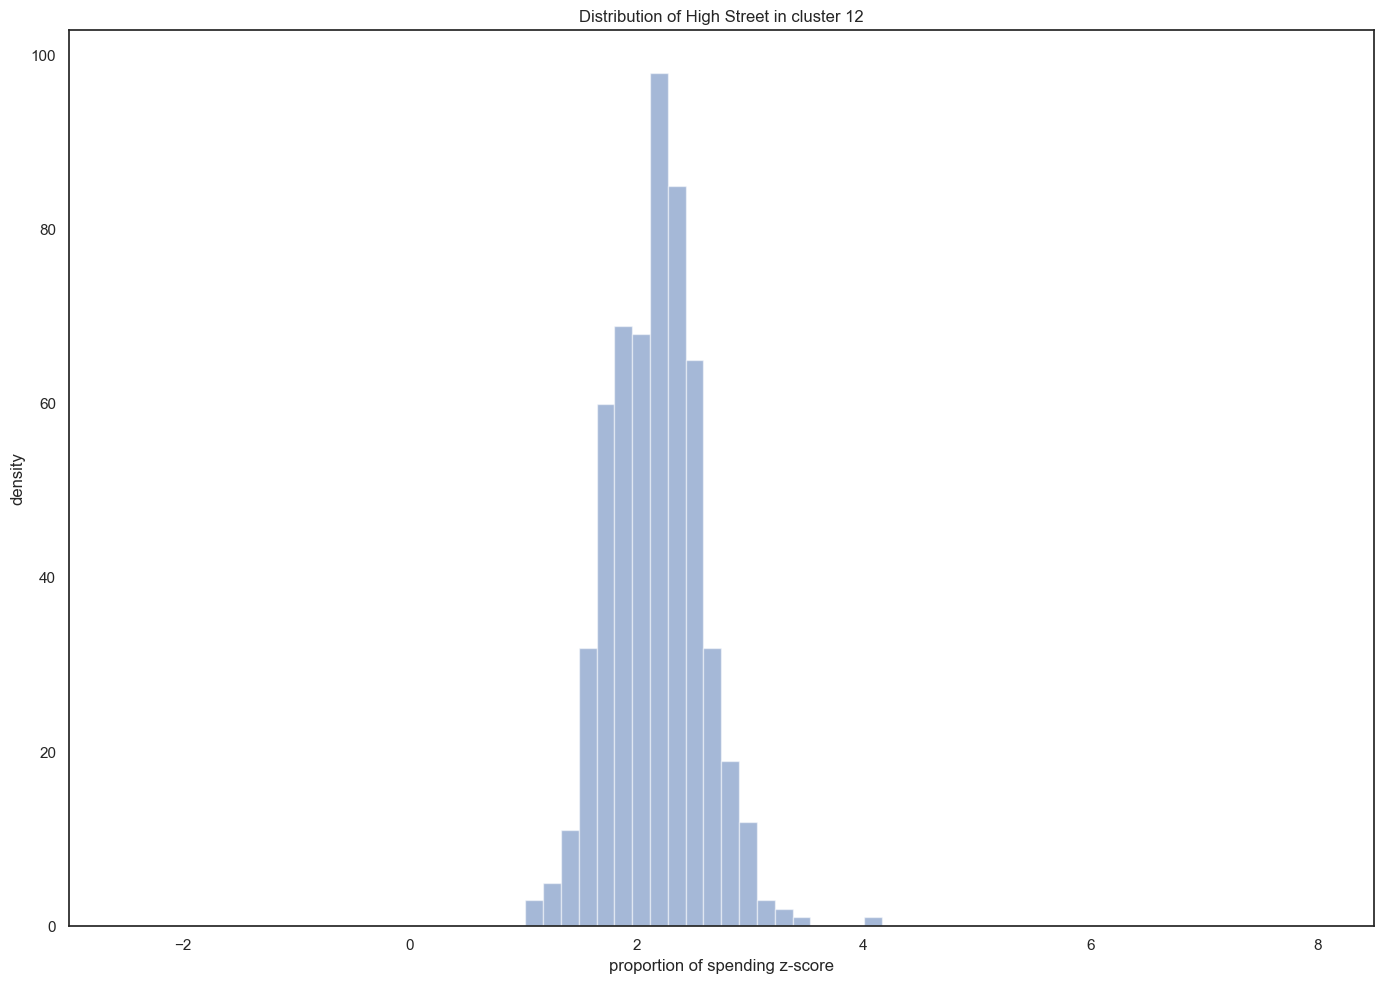

In [157]:
category = 'High Street'

category_by_cluster = spending_data.groupby('cluster_label')[category]

# Plot the distribution of the desired category across all clusters
plt.figure(figsize=(12, 8))
for cluster_label, data in category_by_cluster:
    plt.hist(data, bins=20, alpha=0.5, label=f'Cluster {cluster_label}')
    plt.title(f'Distribution of {category} in cluster {cluster_label}')
    plt.xlabel('proportion of spending z-score')
    plt.ylabel('density')
    plt.xticks(rotation=0)
    plt.xlim(-3,8.5)
    plt.tight_layout()
    plt.show()
    


#### Convert back to orginal proportions using the mena and std from 'sorting_data_into_spending_sectors.csv'

Less informative as you need to be able to see the orginal distribution to determine if the clustering has identified highere than average spenders etc.

In [117]:
mean_values = pd.read_csv('spending_prop_mean_values.csv', header=None, index_col=0)
mean_values = pd.Series(mean_values[1])
std_values = pd.read_csv('spending_prop_std_values.csv', header=None, index_col=0)
std_values = pd.Series(std_values[1])

# Use the mean and standard deviation values to inverse transform the Z-score normalized data
proportion_data = (spending_data.drop('cluster_label', axis=1) * std_values) + mean_values

# Create a new DataFrame with the original data and the original column headingsb
proportion_data = pd.DataFrame(proportion_data, columns=spending_data.drop('cluster_label', axis=1).columns)
proportion_data['cluster_label'] = spending_data['cluster_label']

In [118]:
proportion_data

,Sender account,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label
0,NaN,0.000954,0.449850,7.629613e-04,0.015259,0.013829,0.192970,0.162739,-1.821460e-17,0.039281,-5.204170e-18,-6.245005e-17,0.008869,5.045081e-02,0.065036,0
1,NaN,0.005460,0.498538,4.510281e-17,0.029271,0.006772,0.057354,0.167893,-1.821460e-17,0.105932,1.234208e-02,2.234681e-03,0.000000,-6.505213e-17,0.114204,1
2,NaN,0.003939,0.287744,2.799771e-02,0.100574,0.004417,0.141072,0.110303,-1.821460e-17,0.047357,-5.204170e-18,2.103260e-01,0.002990,-6.505213e-17,0.063280,2
3,NaN,0.002653,0.224114,1.769205e-03,0.005219,0.185147,0.004130,0.165541,-1.821460e-17,0.011942,-5.204170e-18,1.750408e-01,0.107833,2.653808e-03,0.113956,3
4,NaN,0.007990,0.300642,4.510281e-17,0.010122,0.203665,0.062369,0.203119,6.012533e-03,0.051440,-5.204170e-18,4.995730e-03,0.064463,-6.505213e-17,0.085182,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,NaN,0.016106,0.364726,2.274476e-02,0.011276,0.020167,0.046096,0.093518,1.095357e-02,0.082595,1.041877e-01,1.576006e-01,0.000000,-6.505213e-17,0.070029,6
8138,NaN,0.006955,0.326674,3.833558e-02,0.000000,0.014431,0.045500,0.113403,-1.821460e-17,0.021675,-5.204170e-18,1.453496e-03,0.008511,-6.505213e-17,0.423061,10
8139,NaN,0.004377,0.308220,3.146460e-02,0.007506,0.008195,0.048781,0.170683,1.726487e-02,0.029143,5.629849e-03,6.027691e-03,0.006130,-6.505213e-17,0.356578,10
8140,NaN,0.005052,0.389036,2.764098e-03,0.000000,0.053545,0.006361,0.141588,-1.821460e-17,0.034897,6.049425e-02,3.948711e-04,0.000000,7.897422e-04,0.305078,6


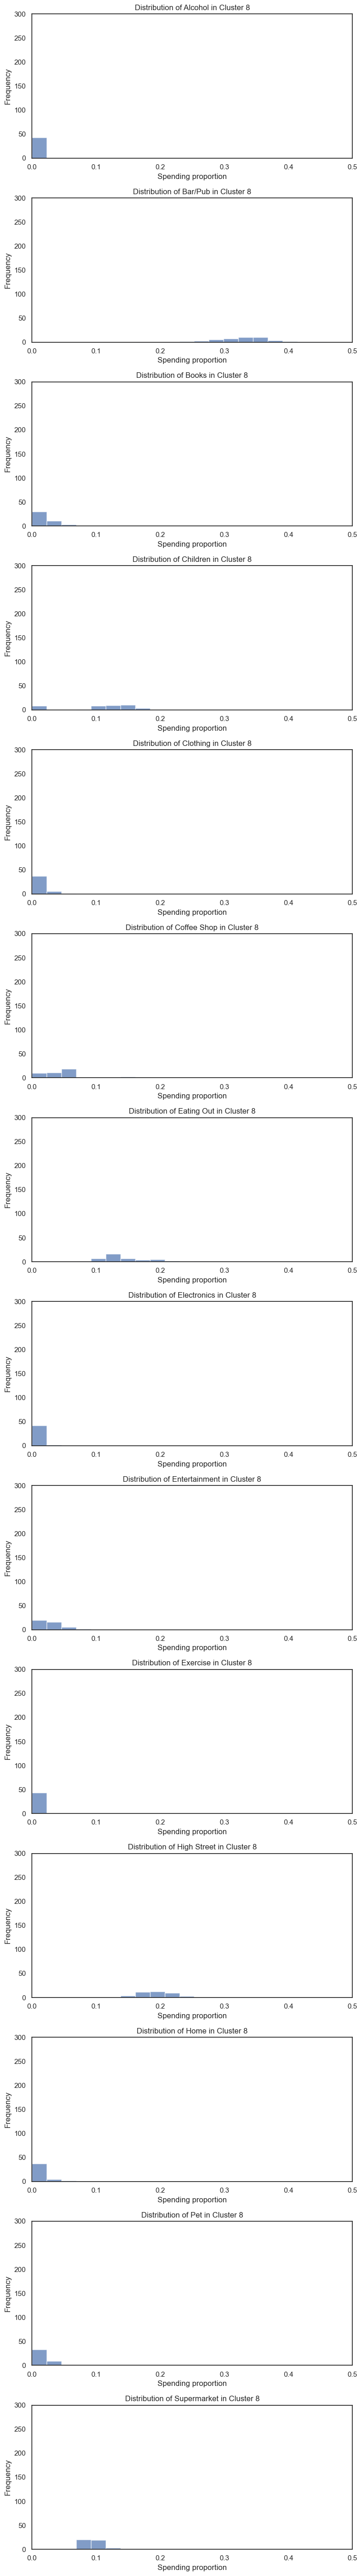

In [128]:
cluster = 8

cluster_data = proportion_data[proportion_data['cluster_label'] == cluster]

categories = cluster_data.drop(['Sender account', 'cluster_label'], axis=1).columns

fig, axs = plt.subplots(len(categories), 1, figsize=(8, len(categories)*4))

min_value = cluster_data[categories].min().min()
max_value = cluster_data[categories].max().max()

num_bins = 20

bin_edges = np.linspace(min_value, max_value, num_bins+1)

for i, category in enumerate(cluster_data.drop(['Sender account', 'cluster_label'], axis=1).columns):

    axs[i].hist(cluster_data[category], bins=bin_edges, density=True, alpha=0.7)
    axs[i].set_title(f'Distribution of {category} in Cluster {cluster}')
    axs[i].set_xlabel('Spending proportion')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xlim(0, 0.5)
    axs[i].set_ylim(0, 300)
plt.tight_layout()
plt.show()

In [121]:
cluster_data

,Sender account,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label
11,NaN,2.314793e-03,0.280638,4.510281e-17,0.148206,1.315329e-02,0.051950,0.151168,-1.821460e-17,7.688189e-03,-5.204170e-18,0.239465,0.000000,-6.505213e-17,0.105416,8
25,NaN,2.906437e-03,0.362917,4.510281e-17,0.000000,1.564542e-02,0.061383,0.165780,-1.821460e-17,1.083144e-02,7.120671e-03,0.202375,0.000000,3.500161e-02,0.136039,8
30,NaN,3.040136e-03,0.389068,4.510281e-17,0.001521,1.431073e-02,0.053465,0.131591,-1.821460e-17,3.353005e-02,-5.204170e-18,0.207672,0.031662,2.620653e-02,0.107934,8
32,NaN,3.209238e-17,0.316501,4.157251e-02,0.124944,-6.938894e-17,0.036910,0.121479,-1.821460e-17,2.360655e-02,-5.204170e-18,0.214764,0.031990,-6.505213e-17,0.088233,8
67,NaN,7.210868e-04,0.279690,3.204830e-03,0.185640,1.217836e-02,0.041775,0.116112,3.677543e-02,2.755193e-02,-5.204170e-18,0.201822,0.000000,2.403623e-03,0.092126,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8007,NaN,3.209238e-17,0.283915,2.325984e-03,0.149328,3.442456e-03,0.047782,0.120881,-1.821460e-17,3.999576e-02,-5.204170e-18,0.209350,0.000000,4.335634e-02,0.099623,8
8013,NaN,3.993735e-03,0.384191,4.439456e-04,0.083728,1.145380e-02,0.054755,0.142759,-1.821460e-17,3.551565e-04,-5.204170e-18,0.204517,0.000000,2.663674e-03,0.111139,8
8022,NaN,1.564911e-03,0.335709,2.966990e-02,0.000000,-6.938894e-17,0.059971,0.188888,-1.821460e-17,8.430322e-02,5.714782e-03,0.178220,0.000000,2.771278e-02,0.088247,8
8033,NaN,3.209238e-17,0.359162,4.510281e-17,0.000000,-6.938894e-17,0.051268,0.116595,-1.821460e-17,-4.163336e-17,-5.204170e-18,0.305234,0.000000,5.625111e-02,0.111489,8


In [91]:
categories

Index(['Alcohol', 'Bar/Pub', 'Books', 'Children', 'Clothing', 'Coffee Shop',
       'Eating Out', 'Electronics', 'Entertainment', 'Exercise', 'High Street',
       'Home', 'Pet', 'Supermarket'],
      dtype='object')

In [ ]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(8, 4))
    plt.bar(account_data.index[:-1], account_data.values[:-1], color='skyblue')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}')
    plt.xlabel('Category')
    plt.ylabel('Proportion of Spending')
    plt.xticks(rotation=45)
    plt.ylim(-0.2, 0.2)
    plt.tight_layout()
    plt.show()

In [12]:
spending_data['Alcohol'].min()

-0.00455653712913

In [28]:
spending_data['cluster_label'].value_counts()

cluster_label
1     1241
4     1172
7      802
6      769
5      762
10     580
12     566
11     515
3      433
0      371
9      349
8      343
2      239
Name: count, dtype: int64

#### Clustering without UMAP

In [63]:
db = DBSCAN(min_samples=10, eps=1)

cluster_labels = db.fit_predict(X)

spending_data['cluster_label'] = cluster_labels

In [64]:
spending_data['cluster_label'].unique()

array([-1,  5,  2,  6,  0,  1, 10,  4,  7,  3,  9, 12,  8, 11],
      dtype=int64)

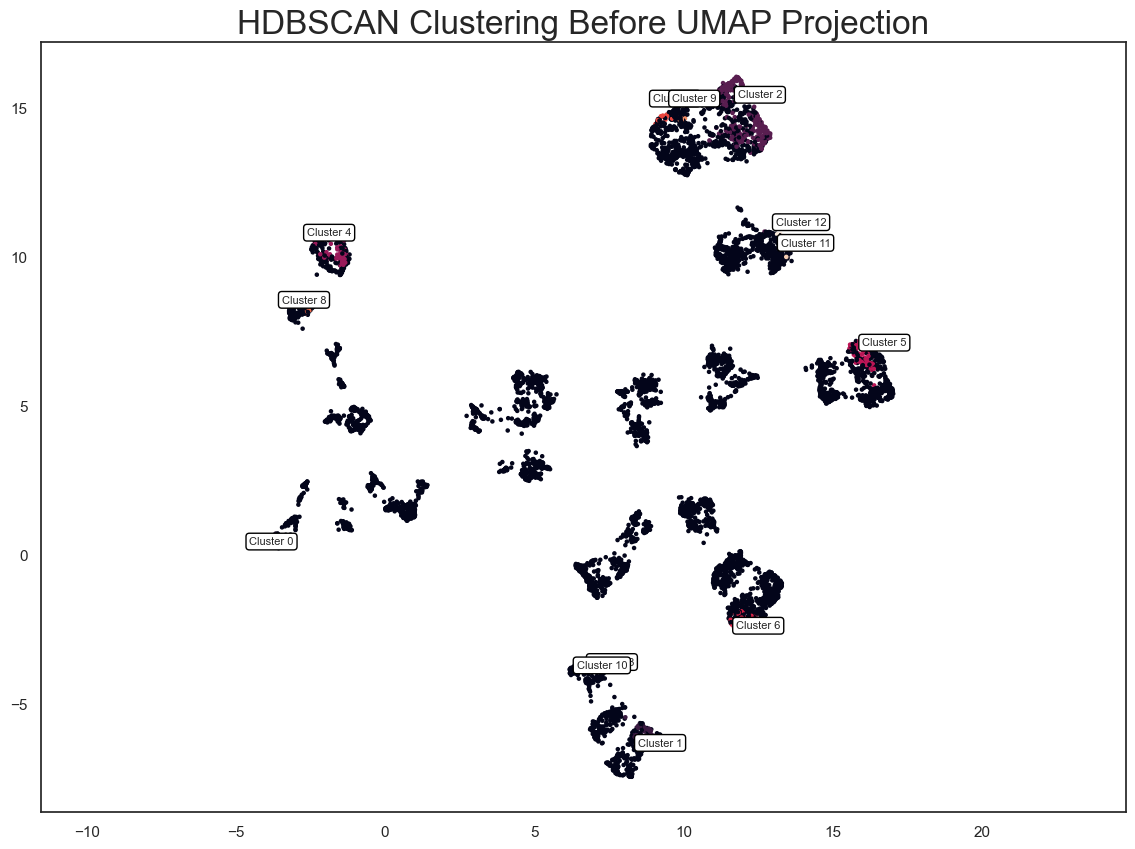

The average silhouette_score is : -0.522776


In [65]:
plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    s=5,
    c=cluster_labels,  # Assign colors based on cluster labels using the colormap
)

for label in np.unique(cluster_labels):
    if label == -1:  # Label noise points separately
        continue
    cluster_center = np.mean(spending_umap[cluster_labels == label], axis=0)
    plt.annotate(
        f'Cluster {label}',
        xy=cluster_center,
        xytext=(cluster_center[0], cluster_center[1]),
        textcoords="offset points",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white')
    )

plt.gca().set_aspect('equal', 'datalim')
plt.title('HDBSCAN Clustering Before UMAP Projection', fontsize=24)
plt.show()
spending_data['cluster_label'].value_counts()


silhouette_avg = silhouette_score(spending_umap, cluster_labels)

print("The average silhouette_score is :", silhouette_avg)

Plotting the proportions for some of the accounts in a cluster

In [50]:
cluster_of_interest = 1

accounts_in_cluster = spending_data[spending_data['cluster_label'] == cluster_of_interest]
sample_accounts = accounts_in_cluster.sample(n=3)


In [51]:
sample_accounts.set_index('Sender account', inplace=True)
sample_accounts

,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label
Sender account,,,,,,,,,,,,,,,
11568.0,2.208717,0.842331,0.886566,-0.579050,-0.593058,-0.336101,0.223174,-0.335033,0.308010,-0.395954,1.374874,-0.412519,-0.38449,-0.787309,1
29702.0,-1.042051,1.332415,-0.641649,-0.731424,-0.637539,-0.145781,-0.410445,0.108836,0.231042,-0.211584,1.719165,-0.839066,-0.38449,-0.672616,1
58898.0,-1.042051,-0.055038,-0.695943,-0.433285,-0.814413,-0.025802,1.359956,0.724513,0.072683,-0.395954,2.102198,-0.782594,-0.38449,-0.837303,1


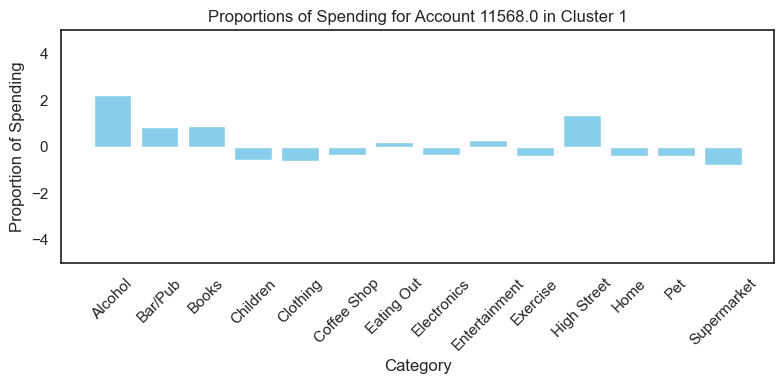

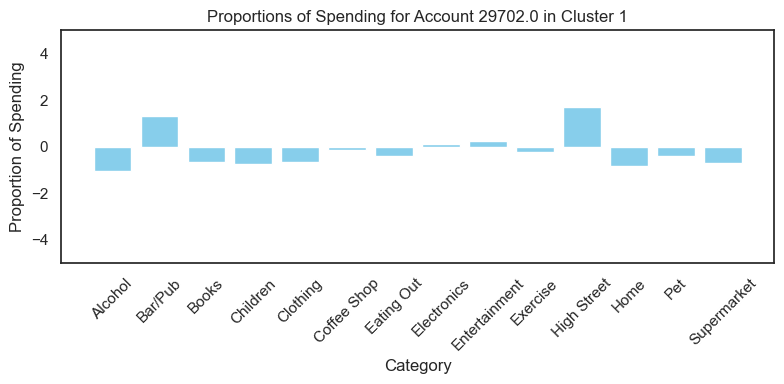

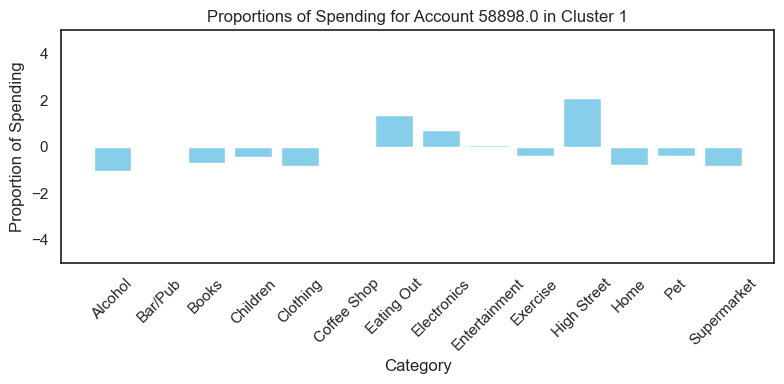

In [53]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(8, 4))
    plt.bar(account_data.index[:-1], account_data.values[:-1], color='skyblue')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}')
    plt.xlabel('Category')
    plt.ylabel('Proportion of Spending')
    plt.xticks(rotation=45)
    plt.ylim(-5, 5)
    plt.tight_layout()
    plt.show()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

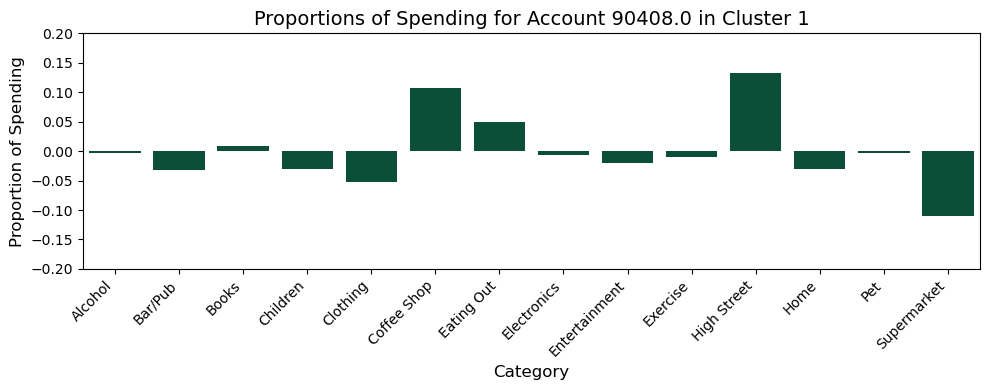

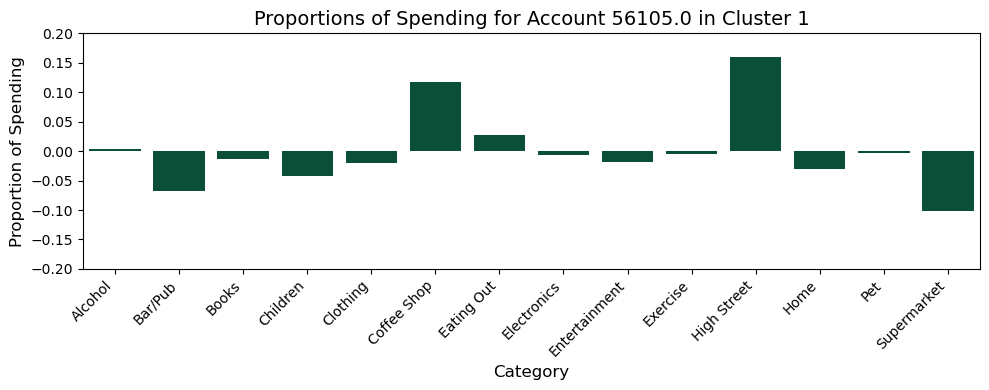

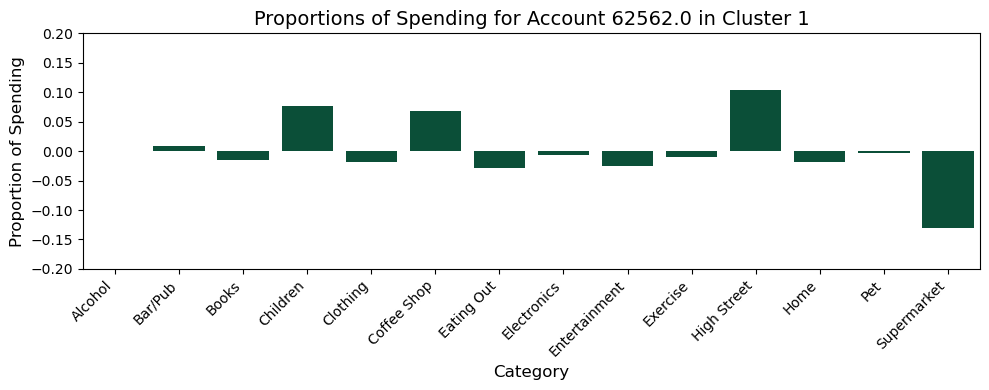

In [20]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x=account_data.index[:-1], y=account_data.values[:-1], color='#005a3c')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}', fontsize=14)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Proportion of Spending', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(-0.2, 0.2)  # Adjust y-axis limits if needed
    plt.tight_layout()
    plt.show()

In [26]:
spending_data['cluster_label'].value_counts()

cluster_label
 0    6292
 3     635
-1     533
 1     412
 2     270
Name: count, dtype: int64